<a href="https://colab.research.google.com/github/DeepFluxion/IBMEC_Aprendizado_Reforco/blob/main/GridWorld_Project/Aula_18_Implementacao_Ambiente_GridWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplos de Código - Para Copiar e Colar no Jupyter Notebook

## 🚀 CÉLULA 1: Imports Iniciais

```python
# Imports básicos
import numpy as np
import matplotlib.pyplot as plt

# Configuração para notebooks
%matplotlib inline

# Importar módulos de RL
from environment import (
    GridWorld,
    create_classic_gridworld,
    create_custom_gridworld,
    create_cliff_world,
    create_cliff_world_2,
    print_gridworld_info
)

from algorithms import (
    # Predição
    td_zero_prediction,
    first_visit_mc_prediction,
    # Controle
    sarsa,
    q_learning,
    expected_sarsa,
    first_visit_mc_control,
    mc_exploring_starts,
    # Auxiliares
    get_greedy_policy
)

from visualization import (
    visualize_gridworld,
    visualize_q_values,
    visualize_q_table_detailed,
    plot_learning_curves,
    plot_value_evolution,
    plot_value_heatmap,
    plot_q_value_heatmap,
    compare_algorithms,
    print_q_table
)

print("✓ Módulos importados com sucesso!")
```

# EXECUTE A CÉLULA ABAIXO CASO ESTEJA NO COLAB
---
CASO CONTÁRIO PULE

In [1]:
# Célula 1: Upload dos arquivos Python
try:
    from google.colab import files

    print("📤 Faça upload dos 3 arquivos Python:")
    print("   1. environment.py")
    print("   2. algorithms.py")
    print("   3. visualization.py")
    print()

    uploaded = files.upload()

    print("\n✅ Arquivos carregados com sucesso!")
    print(f"   Total: {len(uploaded)} arquivo(s)")
except:
    print('Caso esteja executando local baixe os arquivos do Github e passe para os imports')

📤 Faça upload dos 3 arquivos Python:
   1. environment.py
   2. algorithms.py
   3. visualization.py



Saving algorithms.py to algorithms.py
Saving environment.py to environment.py
Saving visualization.py to visualization.py

✅ Arquivos carregados com sucesso!
   Total: 3 arquivo(s)


In [2]:
# Imports básicos
import numpy as np
import matplotlib.pyplot as plt

# Configuração para notebooks
%matplotlib inline

# Importar módulos de RL
from environment import (
    GridWorld,
    create_classic_gridworld,
    create_custom_gridworld,
    create_cliff_world,
    create_cliff_world_2,
    print_gridworld_info
)

from algorithms import (
    # Predição
    td_zero_prediction,
    first_visit_mc_prediction,
    # Controle
    sarsa,
    q_learning,
    expected_sarsa,
    first_visit_mc_control,
    mc_exploring_starts,
    # Auxiliares
    get_greedy_policy
)

from visualization import (
    visualize_gridworld,
    visualize_q_values,
    visualize_q_table_detailed,
    plot_learning_curves,
    plot_value_evolution,
    plot_value_heatmap,
    plot_q_value_heatmap,
    compare_algorithms,
    print_q_table
)

print("✓ Módulos importados com sucesso!")

✓ Módulos importados com sucesso!


## 🏗️ Passo 1: Criar Ambiente Clássico

```python
# Criar GridWorld 4x3 clássico
gw = create_classic_gridworld()

# Visualizar
visualize_gridworld(gw, title="GridWorld 4x3 Clássico")

# Informações
print_gridworld_info(gw)
```

In [3]:
# Criar GridWorld 4x3 clássico
gw = create_classic_gridworld()

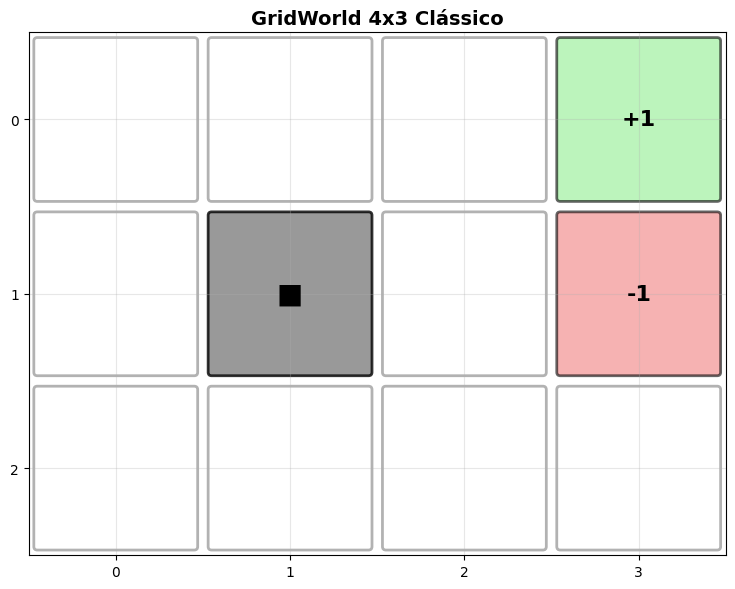

In [4]:
# Visualizar
visualize_gridworld(gw, title="GridWorld 4x3 Clássico")

In [5]:
# Informações
print_gridworld_info(gw)

INFORMAÇÕES DO GRIDWORLD
Dimensões: 3 linhas x 4 colunas
Total de estados: 11
Paredes: 1
Estados terminais: 2
Fator de desconto (γ): 0.9
Ruído: 0.2
Living reward: -0.04
Ações disponíveis: ['N', 'S', 'L', 'O']

Paredes: [(1, 1)]

Estados terminais:
  (0, 3): reward = 1.0
  (1, 3): reward = -1.0


## 🎯 PASSO 2: Experimento Rápido - Q-Learning

```python
# Treinar Q-Learning
print("→ Treinando Q-Learning...")
Q, rewards = q_learning(
    gridworld=gw,
    n_episodes=1000,
    alpha=0.1,
    gamma=0.9,
    epsilon=0.1,
    verbose=True
)

# Extrair política
policy = get_greedy_policy(Q, gw)

# Visualizar
visualize_gridworld(gw, policy=policy, title="Q-Learning - Política Aprendida")
visualize_q_values(Q, gw, title="Q-Learning - Valores Q")

print("\n✓ Treinamento concluído!")
```

In [6]:
# Treinar Q-Learning
print("→ Treinando Q-Learning...")
Q, rewards = q_learning(
    gridworld=gw,
    n_episodes=1000,
    alpha=0.1,
    gamma=0.9,
    epsilon=0.1,
    verbose=True
)
print("\n✓ Treinamento concluído!")

→ Treinando Q-Learning...
Episódio 100/1000 - Reward médio: 0.58
Episódio 200/1000 - Reward médio: 0.62
Episódio 300/1000 - Reward médio: 0.71
Episódio 400/1000 - Reward médio: 0.73
Episódio 500/1000 - Reward médio: 0.58
Episódio 600/1000 - Reward médio: 0.72
Episódio 700/1000 - Reward médio: 0.65
Episódio 800/1000 - Reward médio: 0.64
Episódio 900/1000 - Reward médio: 0.72
Episódio 1000/1000 - Reward médio: 0.67

✓ Treinamento concluído!


In [7]:
# Extrair política
policy = get_greedy_policy(Q, gw)

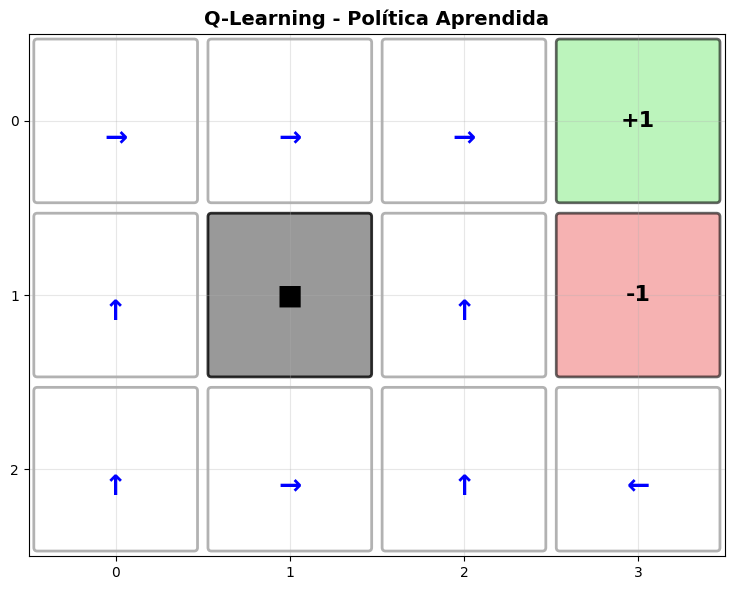

In [8]:
# Visualizar
visualize_gridworld(gw, policy=policy, title="Q-Learning - Política Aprendida")

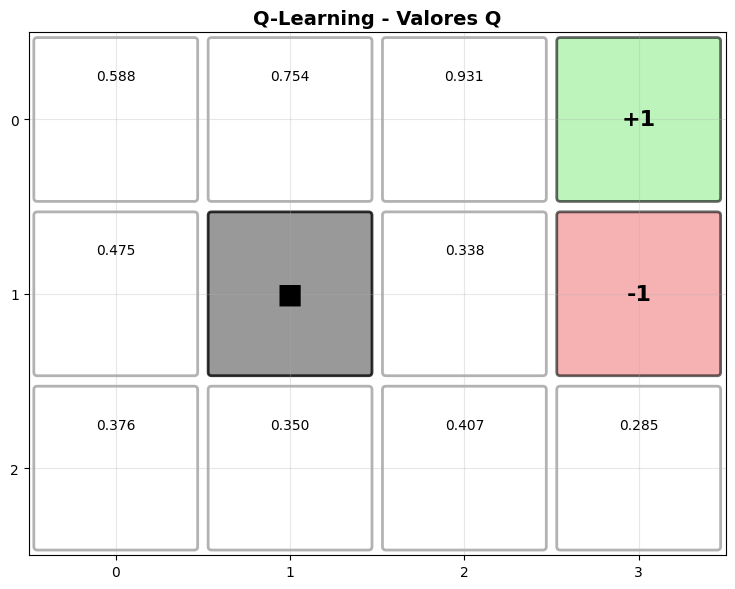

In [9]:
visualize_q_values(Q, gw, title="Q-Learning - Valores Q")

## 📊 PASSO 3: Comparar SARSA vs Q-Learning vs Expected SARSA

```python
# Parâmetros
PARAMS = {
    'n_episodes': 1000,
    'alpha': 0.1,
    'gamma': 0.9,
    'epsilon': 0.1
}

# Treinar os três algoritmos
print("→ Treinando SARSA...")
Q_sarsa, rewards_sarsa = sarsa(gw, **PARAMS, verbose=True)

print("\n→ Treinando Q-Learning...")
Q_qlearning, rewards_qlearning = q_learning(gw, **PARAMS, verbose=True)

print("\n→ Treinando Expected SARSA...")
Q_expected, rewards_expected = expected_sarsa(gw, **PARAMS, verbose=True)

# Visualizar curvas de aprendizado
plot_learning_curves({
    'SARSA': rewards_sarsa,
    'Q-Learning': rewards_qlearning,
    'Expected SARSA': rewards_expected
}, window=100, title="Comparação de Algoritmos TD")

# Comparar valores
compare_algorithms({
    'SARSA': Q_sarsa,
    'Q-Learning': Q_qlearning,
    'Expected SARSA': Q_expected
}, gw)

print("\n✓ Comparação concluída!")
```

In [10]:
# Parâmetros
PARAMS = {
    'n_episodes': 1000,
    'alpha': 0.1,
    'gamma': 0.9,
    'epsilon': 0.1
}

In [11]:
# Treinar os três algoritmos
print("→ Treinando SARSA...")
Q_sarsa, rewards_sarsa = sarsa(gw, **PARAMS, verbose=True)

→ Treinando SARSA...
Episódio 100/1000 - Reward médio: 0.39
Episódio 200/1000 - Reward médio: 0.74
Episódio 300/1000 - Reward médio: 0.76
Episódio 400/1000 - Reward médio: 0.77
Episódio 500/1000 - Reward médio: 0.67
Episódio 600/1000 - Reward médio: 0.64
Episódio 700/1000 - Reward médio: 0.76
Episódio 800/1000 - Reward médio: 0.56
Episódio 900/1000 - Reward médio: 0.69
Episódio 1000/1000 - Reward médio: 0.65


In [12]:
print("\n→ Treinando Q-Learning...")
Q_qlearning, rewards_qlearning = q_learning(gw, **PARAMS, verbose=True)


→ Treinando Q-Learning...
Episódio 100/1000 - Reward médio: 0.46
Episódio 200/1000 - Reward médio: 0.64
Episódio 300/1000 - Reward médio: 0.51
Episódio 400/1000 - Reward médio: 0.57
Episódio 500/1000 - Reward médio: 0.64
Episódio 600/1000 - Reward médio: 0.58
Episódio 700/1000 - Reward médio: 0.66
Episódio 800/1000 - Reward médio: 0.74
Episódio 900/1000 - Reward médio: 0.64
Episódio 1000/1000 - Reward médio: 0.58


In [13]:
print("\n→ Treinando Expected SARSA...")
Q_expected, rewards_expected = expected_sarsa(gw, **PARAMS, verbose=True)


→ Treinando Expected SARSA...
Episódio 100/1000 - Reward médio: 0.44
Episódio 200/1000 - Reward médio: 0.67
Episódio 300/1000 - Reward médio: 0.59
Episódio 400/1000 - Reward médio: 0.67
Episódio 500/1000 - Reward médio: 0.63
Episódio 600/1000 - Reward médio: 0.52
Episódio 700/1000 - Reward médio: 0.71
Episódio 800/1000 - Reward médio: 0.58
Episódio 900/1000 - Reward médio: 0.60
Episódio 1000/1000 - Reward médio: 0.73


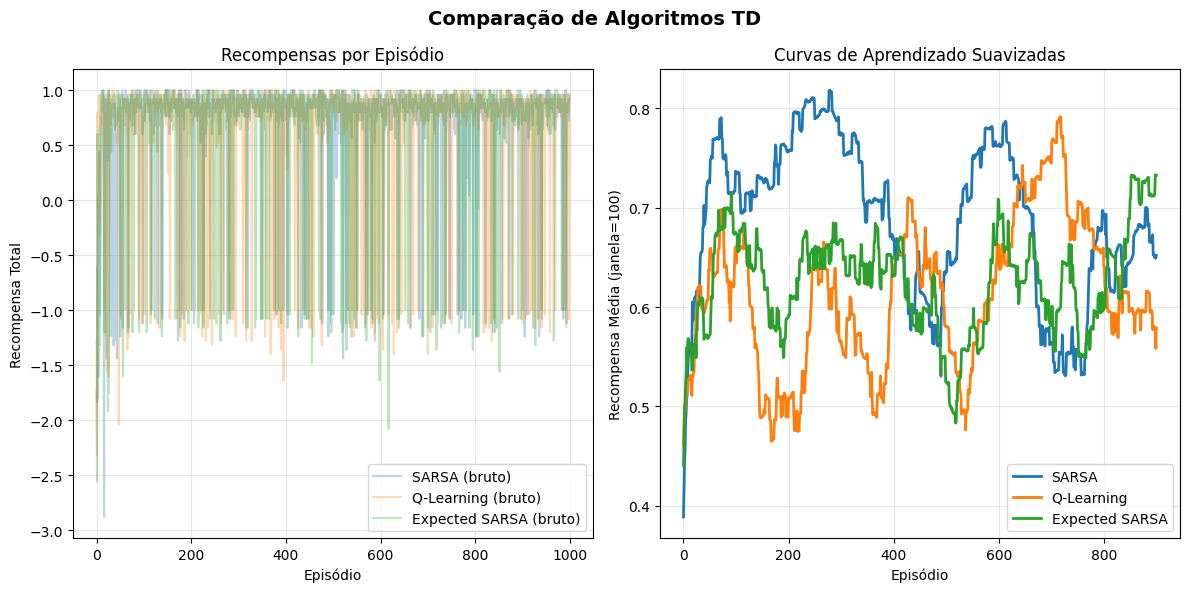

In [14]:
# Visualizar curvas de aprendizado
plot_learning_curves({
    'SARSA': rewards_sarsa,
    'Q-Learning': rewards_qlearning,
    'Expected SARSA': rewards_expected
}, window=100, title="Comparação de Algoritmos TD")

In [15]:
# Comparar valores
compare_algorithms({
    'SARSA': Q_sarsa,
    'Q-Learning': Q_qlearning,
    'Expected SARSA': Q_expected
}, gw)

print("\n✓ Comparação concluída!")

COMPARAÇÃO DE VALORES APRENDIDOS

Estado         SARSA               Q-Learning          Expected SARSA      
--------------------------------------------------------------------------------
(0, 0)         0.6134              0.6105              0.5855              
(0, 1)         0.7791              0.7793              0.7720              
(0, 2)         0.9805              0.9790              0.9515              
(1, 0)         0.3972              0.4786              0.4223              
(1, 2)         0.5202              0.5770              0.7357              
(2, 0)         0.2444              0.2367              0.2183              
(2, 1)         0.2481              0.2968              0.3158              
(2, 2)         0.4644              0.4250              0.5083              
(2, 3)         0.1641              0.2637              0.0874              

ESTATÍSTICAS RESUMIDAS:
--------------------------------------------------------------------------------

SARSA:
  Valor méd

## 🎨 PASSO 4: Visualizações Detalhadas

```python
# Visualizar políticas aprendidas
for name, Q in [('SARSA', Q_sarsa),
                ('Q-Learning', Q_qlearning),
                ('Expected SARSA', Q_expected)]:
    
    policy = get_greedy_policy(Q, gw)
    
    print(f"\n{'='*60}")
    print(f"{name}")
    print('='*60)
    
    # Política
    visualize_gridworld(gw, policy=policy, title=f"{name} - Política")
    
    # Valores Q
    visualize_q_values(Q, gw, title=f"{name} - Valores Q")
    
    # Q-values detalhados
    visualize_q_table_detailed(Q, gw, title=f"{name} - Q-Values Detalhados")
    
    # Heatmap
    plot_q_value_heatmap(Q, gw, title=f"{name} - Heatmap")
```


SARSA


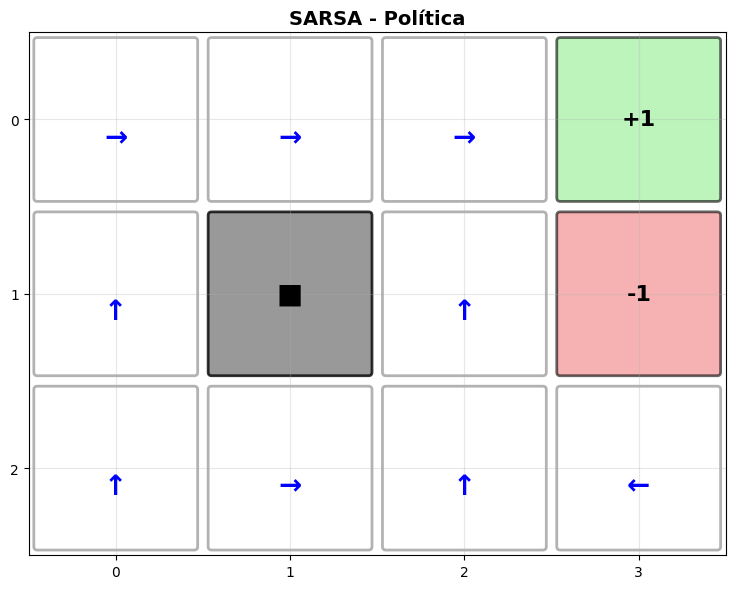

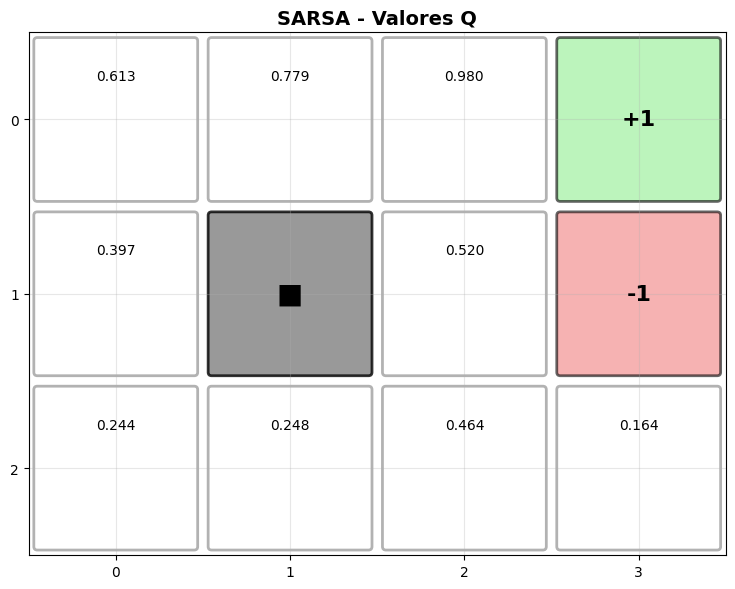

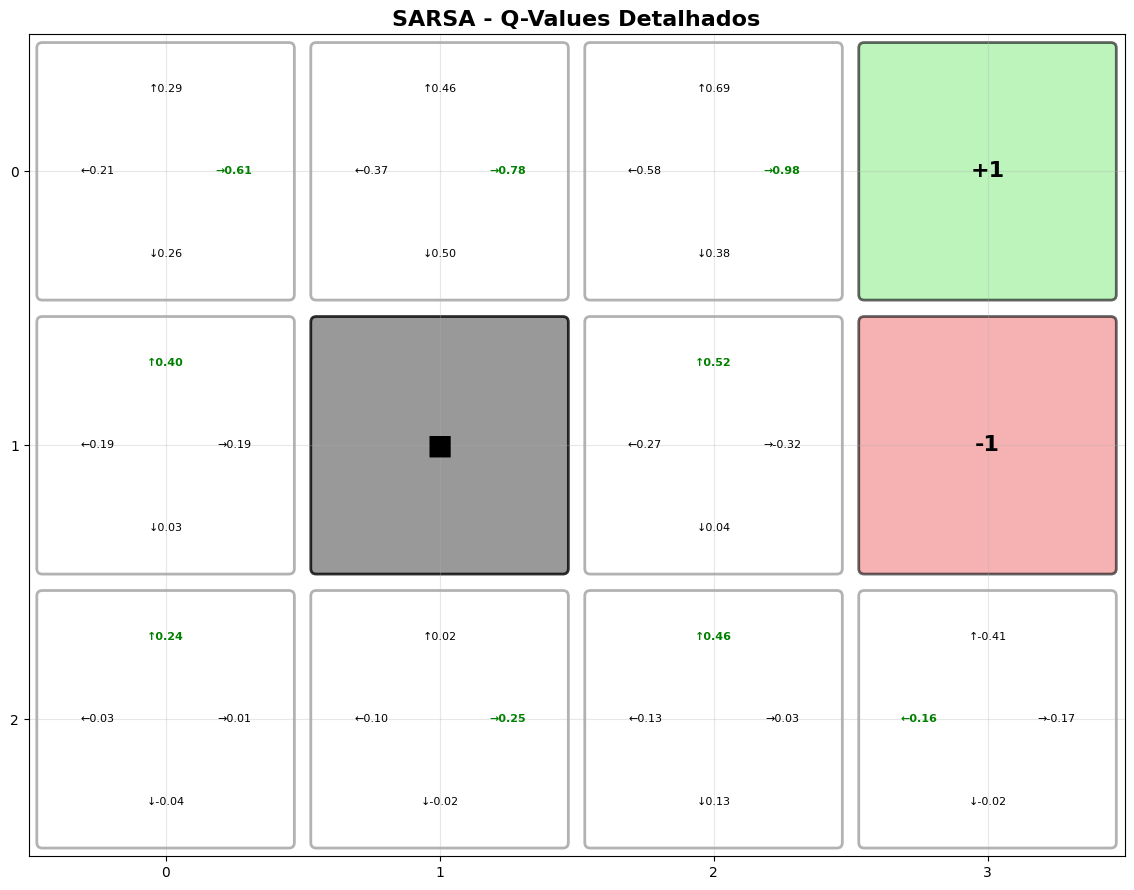

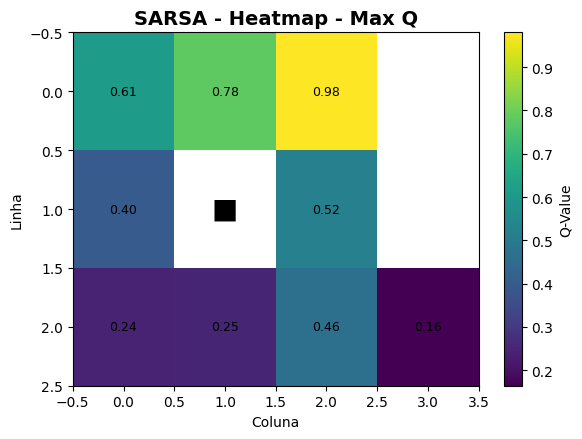


Q-Learning


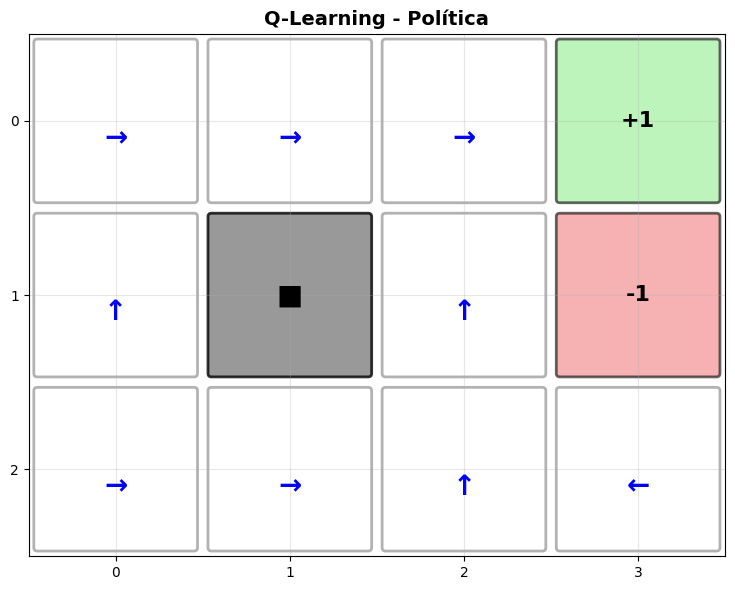

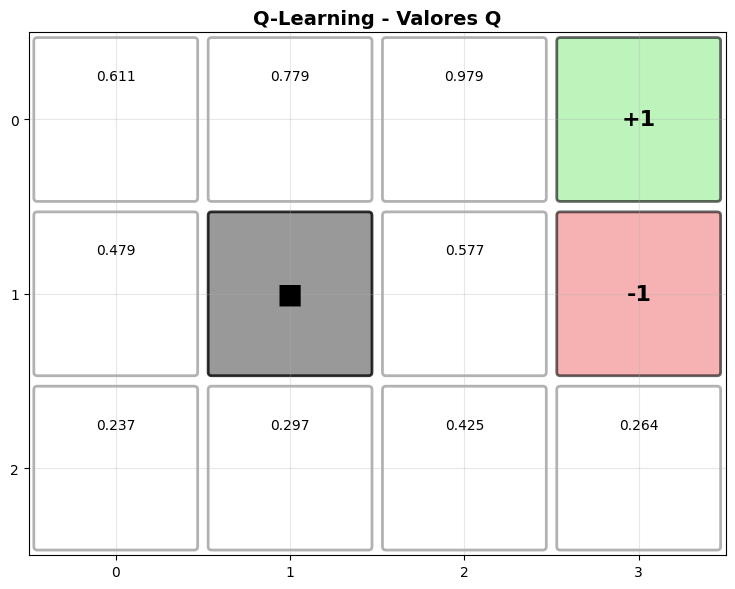

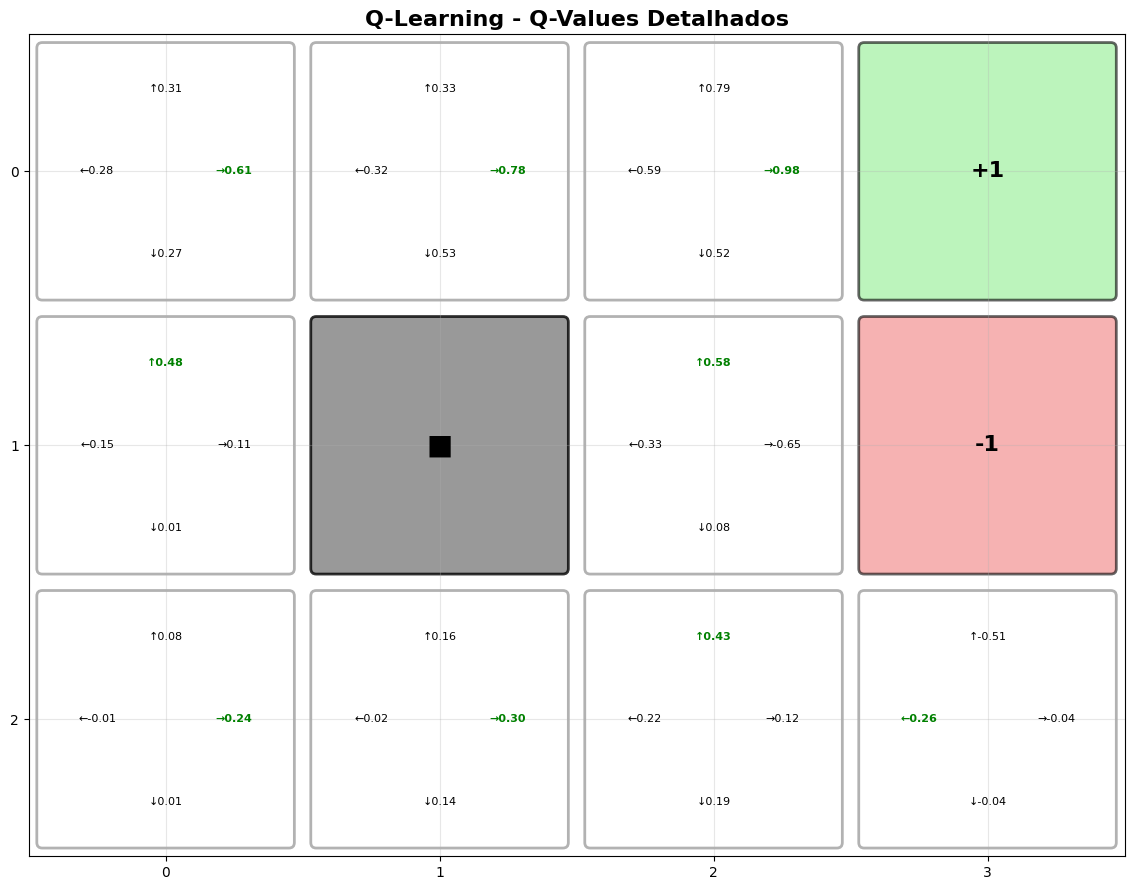

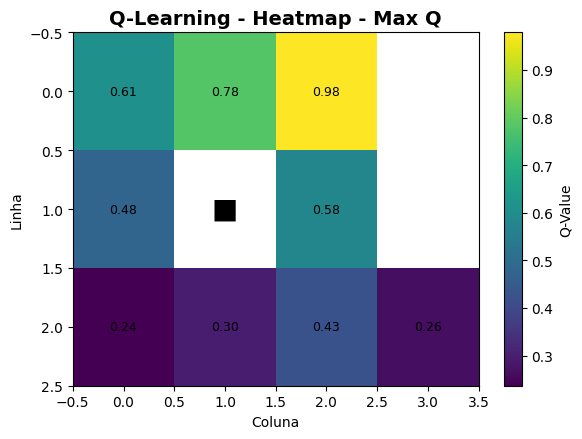


Expected SARSA


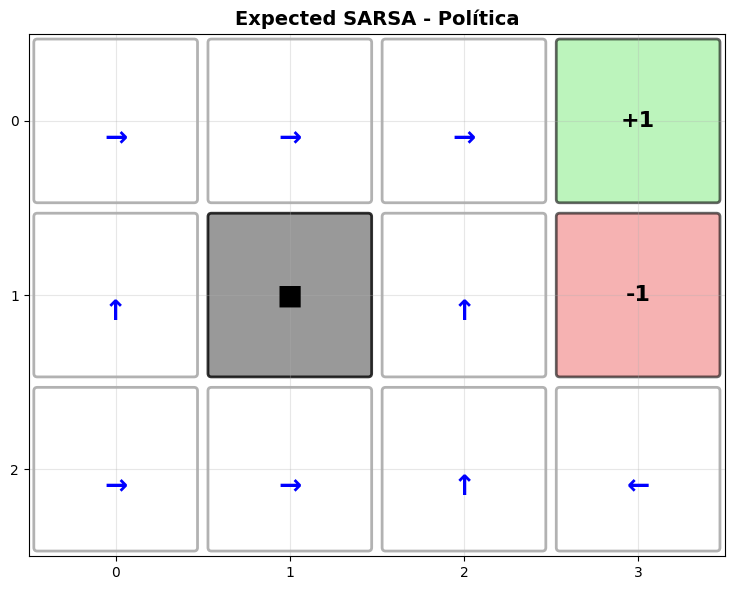

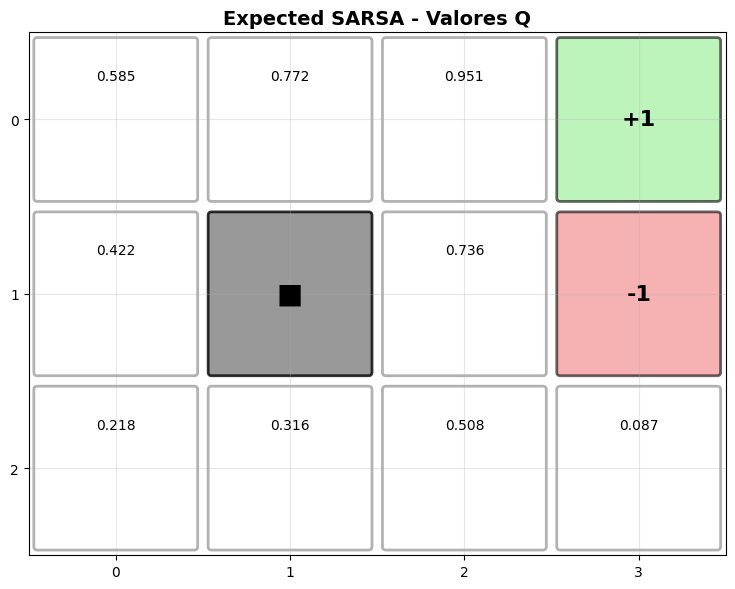

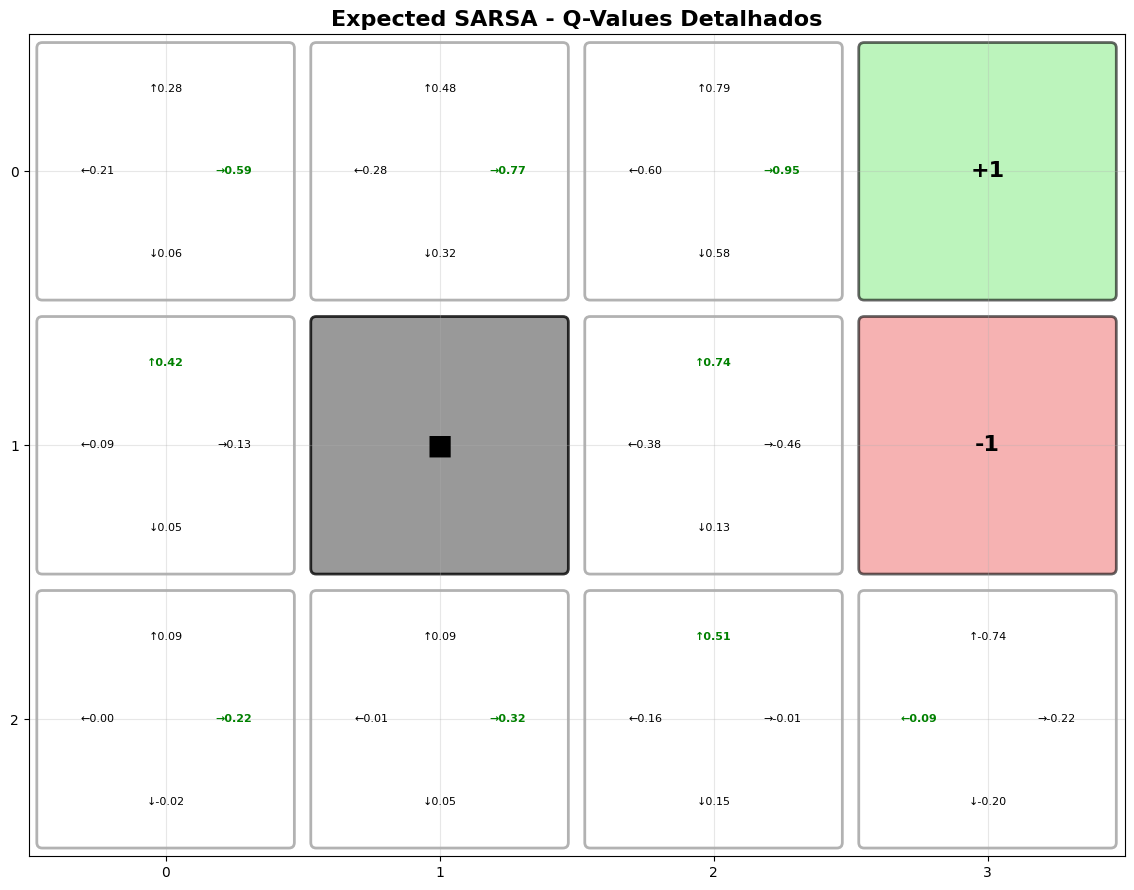

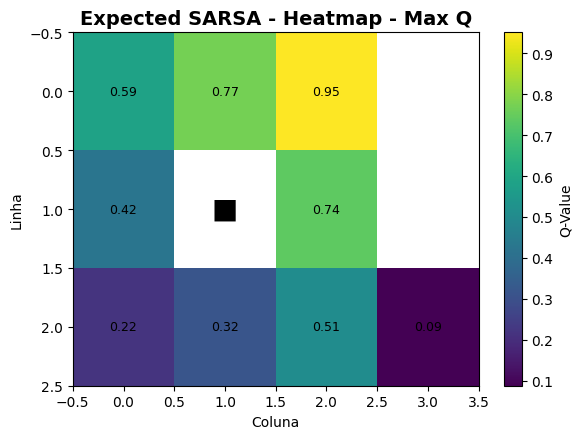

In [16]:
# Visualizar políticas aprendidas
for name, Q in [('SARSA', Q_sarsa),
                ('Q-Learning', Q_qlearning),
                ('Expected SARSA', Q_expected)]:

    policy = get_greedy_policy(Q, gw)

    print(f"\n{'='*60}")
    print(f"{name}")
    print('='*60)

    # Política
    visualize_gridworld(gw, policy=policy, title=f"{name} - Política")

    # Valores Q
    visualize_q_values(Q, gw, title=f"{name} - Valores Q")

    # Q-values detalhados
    visualize_q_table_detailed(Q, gw, title=f"{name} - Q-Values Detalhados")

    # Heatmap
    plot_q_value_heatmap(Q, gw, title=f"{name} - Heatmap")

## 🔬 PASSO 5: Avaliação de Política com TD(0)

```python
# Criar política de teste (sempre ir para Leste)
policy_test = {s: 'L' for s in gw.states if not gw.is_terminal(s)}

# Visualizar política
visualize_gridworld(gw, policy=policy_test, title="Política de Teste: Sempre Leste")

# Avaliar com TD(0)
print("\n→ Avaliando política com TD(0)...")
V_td = td_zero_prediction(
    gridworld=gw,
    policy=policy_test,
    n_episodes=1000,
    alpha=0.1,
    verbose=True
)

# Visualizar resultados
visualize_gridworld(gw, values=V_td, policy=policy_test,
                   title="TD(0) - Valores + Política")
plot_value_heatmap(V_td, gw, title="TD(0) - Heatmap de Valores")

print("\n✓ Avaliação concluída!")
```

In [18]:
# Criar política de teste (sempre ir para Leste)
policy_test = {s: 'L' for s in gw.states if not gw.is_terminal(s)}

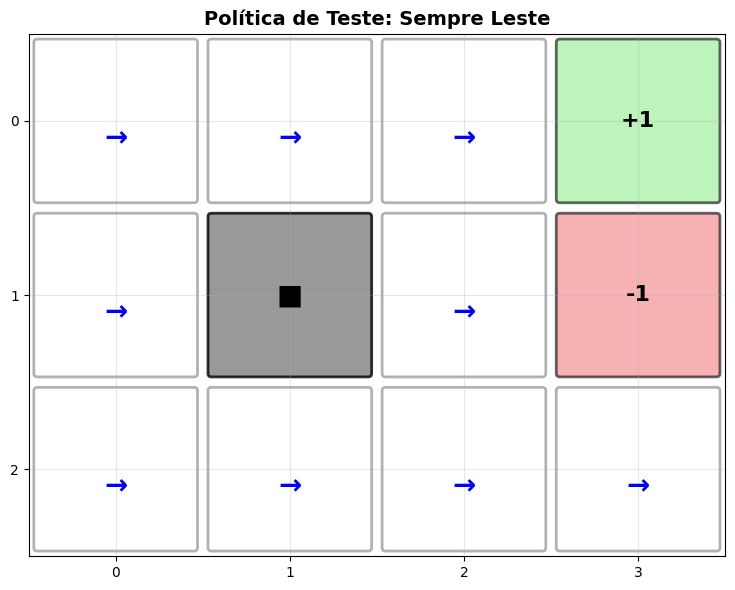

In [19]:
# Visualizar política
visualize_gridworld(gw, policy=policy_test, title="Política de Teste: Sempre Leste")

In [20]:
# Avaliar com TD(0)
print("\n→ Avaliando política com TD(0)...")
V_td = td_zero_prediction(
    gridworld=gw,
    policy=policy_test,
    n_episodes=1000,
    alpha=0.1,
    verbose=True
)


→ Avaliando política com TD(0)...
Episódio 100/1000 - V médio: -0.1459
Episódio 200/1000 - V médio: -0.1875
Episódio 300/1000 - V médio: -0.1756
Episódio 400/1000 - V médio: -0.2097
Episódio 500/1000 - V médio: -0.2286
Episódio 600/1000 - V médio: -0.1879
Episódio 700/1000 - V médio: -0.1905
Episódio 800/1000 - V médio: -0.2205
Episódio 900/1000 - V médio: -0.1519
Episódio 1000/1000 - V médio: -0.1633


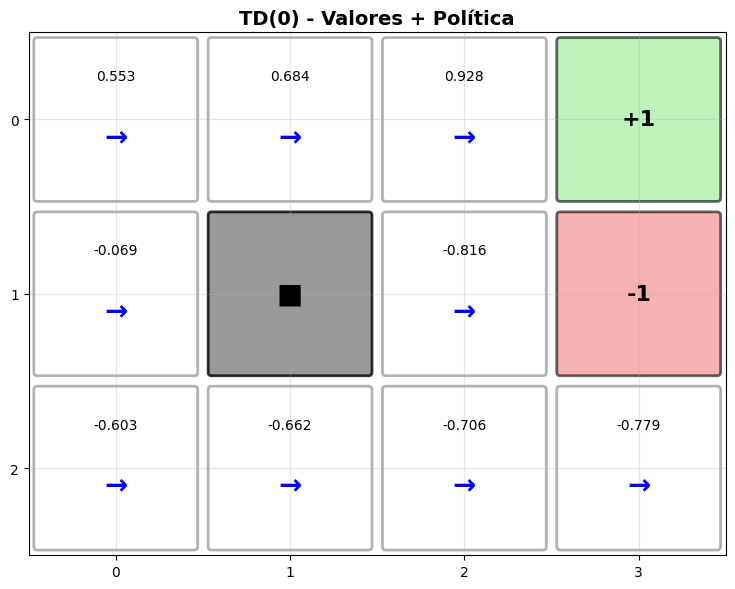

In [21]:
# Visualizar resultados
visualize_gridworld(gw, values=V_td, policy=policy_test,
                   title="TD(0) - Valores + Política")

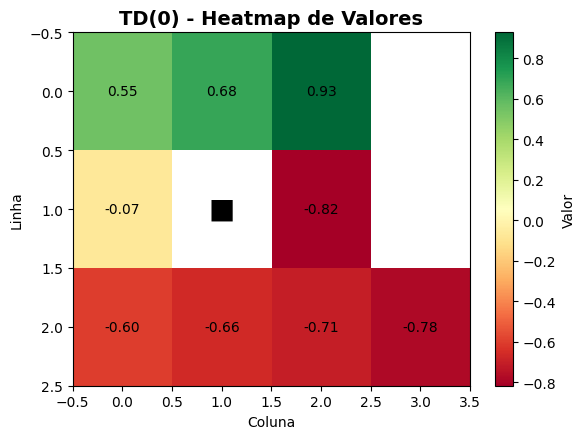


✓ Avaliação concluída!


In [22]:
plot_value_heatmap(V_td, gw, title="TD(0) - Heatmap de Valores")

print("\n✓ Avaliação concluída!")

## 🆚 CÉLULA 7: TD(0) vs Monte Carlo

```python
# Criar política
policy = {s: 'N' for s in gw.states if not gw.is_terminal(s)}

# Treinar TD(0)
print("→ Treinando TD(0)...")
V_td = td_zero_prediction(gw, policy, n_episodes=1000, alpha=0.1, verbose=True)

# Treinar Monte Carlo
print("\n→ Treinando Monte Carlo...")
V_mc = first_visit_mc_prediction(gw, policy, n_episodes=1000, alpha=0.1, verbose=True)

# Comparar visualmente
print("\n→ Visualizando resultados...")
visualize_gridworld(gw, values=V_td, title="TD(0) - Valores V(s)")
visualize_gridworld(gw, values=V_mc, title="Monte Carlo - Valores V(s)")

# Comparar numericamente
print("\n" + "="*60)
print("COMPARAÇÃO TD(0) vs MONTE CARLO")
print("="*60)
print(f"{'Estado':<15} {'TD(0)':<15} {'MC':<15} {'Diferença':<15}")
print("-"*60)

for state in gw.states:
    if not gw.is_terminal(state) and state not in gw.walls:
        diff = abs(V_td[state] - V_mc[state])
        print(f"{str(state):<15} {V_td[state]:<15.4f} {V_mc[state]:<15.4f} {diff:<15.6f}")

print("\n✓ Comparação concluída!")
```

In [23]:
# Criar política
policy = {s: 'N' for s in gw.states if not gw.is_terminal(s)}

In [24]:
# Treinar TD(0)
print("→ Treinando TD(0)...")
V_td = td_zero_prediction(gw, policy, n_episodes=1000, alpha=0.1, verbose=True)

→ Treinando TD(0)...
Episódio 100/1000 - V médio: -0.1335
Episódio 200/1000 - V médio: -0.1704
Episódio 300/1000 - V médio: -0.2497
Episódio 400/1000 - V médio: -0.2451
Episódio 500/1000 - V médio: -0.2129
Episódio 600/1000 - V médio: -0.2136
Episódio 700/1000 - V médio: -0.1893
Episódio 800/1000 - V médio: -0.2057
Episódio 900/1000 - V médio: -0.2759
Episódio 1000/1000 - V médio: -0.2325


In [25]:
# Treinar Monte Carlo
print("\n→ Treinando Monte Carlo...")
V_mc = first_visit_mc_prediction(gw, policy, n_episodes=1000, alpha=0.1, verbose=True)


→ Treinando Monte Carlo...
Episódio 100/1000 - V médio: 0.0449
Episódio 200/1000 - V médio: -0.0201
Episódio 300/1000 - V médio: -0.0395
Episódio 400/1000 - V médio: -0.0643
Episódio 500/1000 - V médio: -0.0720
Episódio 600/1000 - V médio: -0.0130
Episódio 700/1000 - V médio: -0.0749
Episódio 800/1000 - V médio: -0.0656
Episódio 900/1000 - V médio: -0.0525
Episódio 1000/1000 - V médio: -0.1000



→ Visualizando resultados...


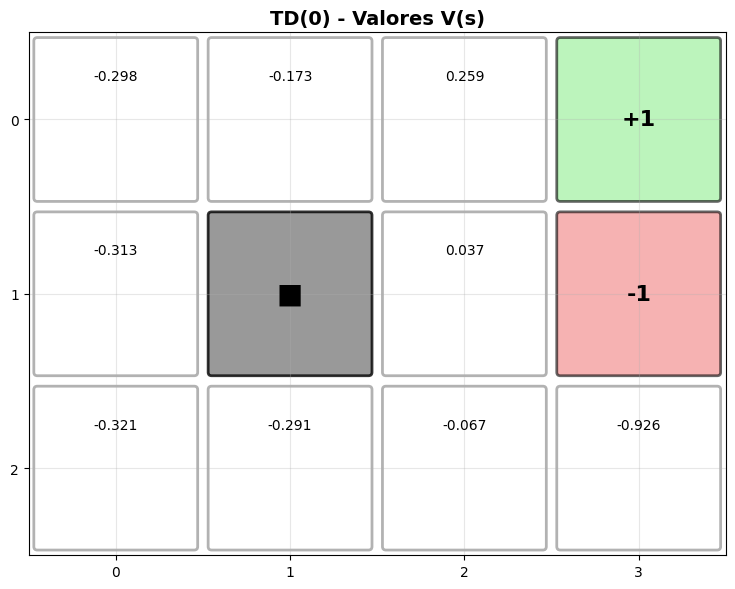

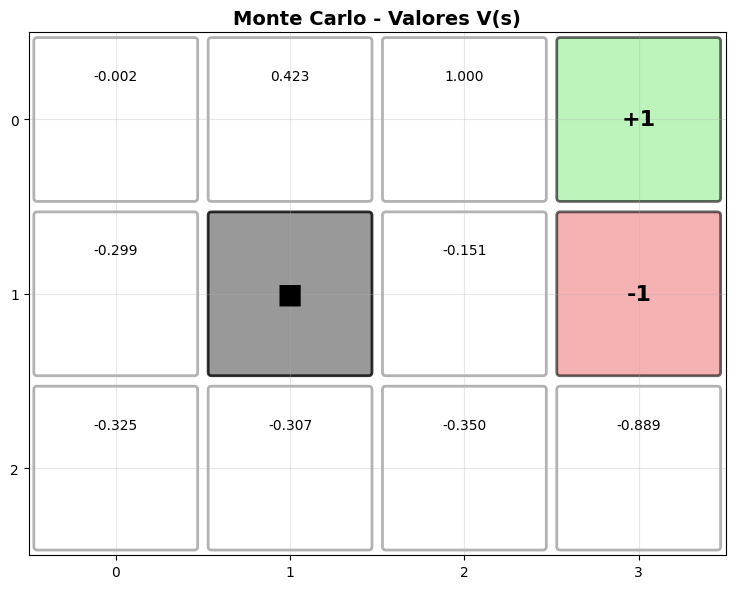

In [26]:
# Comparar visualmente
print("\n→ Visualizando resultados...")
visualize_gridworld(gw, values=V_td, title="TD(0) - Valores V(s)")
visualize_gridworld(gw, values=V_mc, title="Monte Carlo - Valores V(s)")

In [27]:
# Comparar numericamente
print("\n" + "="*60)
print("COMPARAÇÃO TD(0) vs MONTE CARLO")
print("="*60)
print(f"{'Estado':<15} {'TD(0)':<15} {'MC':<15} {'Diferença':<15}")
print("-"*60)

for state in gw.states:
    if not gw.is_terminal(state) and state not in gw.walls:
        diff = abs(V_td[state] - V_mc[state])
        print(f"{str(state):<15} {V_td[state]:<15.4f} {V_mc[state]:<15.4f} {diff:<15.6f}")

print("\n✓ Comparação concluída!")


COMPARAÇÃO TD(0) vs MONTE CARLO
Estado          TD(0)           MC              Diferença      
------------------------------------------------------------
(0, 0)          -0.2984         -0.0024         0.296007       
(0, 1)          -0.1731         0.4229          0.596017       
(0, 2)          0.2595          1.0000          0.740532       
(1, 0)          -0.3125         -0.2985         0.014012       
(1, 2)          0.0370          -0.1507         0.187711       
(2, 0)          -0.3211         -0.3255         0.004406       
(2, 1)          -0.2914         -0.3066         0.015199       
(2, 2)          -0.0667         -0.3504         0.283623       
(2, 3)          -0.9256         -0.8891         0.036489       

✓ Comparação concluída!


## 🔧 PASSO 7 : Análise de Sensibilidade - Alpha

```python
# Testar diferentes valores de alpha
alphas = [0.01, 0.05, 0.1, 0.3, 0.5]
results_alpha = {}

print("ANÁLISE DE SENSIBILIDADE - PARÂMETRO ALPHA")
print("="*60)

for alpha in alphas:
    print(f"\n→ Treinando com α = {alpha}...")
    Q, rewards = q_learning(
        gw,
        n_episodes=500,
        alpha=alpha,
        gamma=0.9,
        epsilon=0.1
    )
    
    results_alpha[f'α={alpha}'] = rewards
    
    # Calcular valor médio
    values = []
    for state in gw.states:
        if not gw.is_terminal(state) and state not in gw.walls:
            state_idx = state[0] * gw.cols + state[1]
            values.append(np.max(Q[state_idx]))
    
    avg_value = np.mean(values)
    print(f"   Valor médio final: {avg_value:.4f}")

# Plotar comparação
plot_learning_curves(results_alpha, window=50,
                    title="Sensibilidade ao α (Taxa de Aprendizado)")

print("\n✓ Análise concluída!")
```

ANÁLISE DE SENSIBILIDADE - PARÂMETRO ALPHA

→ Treinando com α = 0.01...
   Valor médio final: 0.2711

→ Treinando com α = 0.05...
   Valor médio final: 0.5218

→ Treinando com α = 0.1...
   Valor médio final: 0.5548

→ Treinando com α = 0.3...
   Valor médio final: 0.4565

→ Treinando com α = 0.5...
   Valor médio final: 0.5235


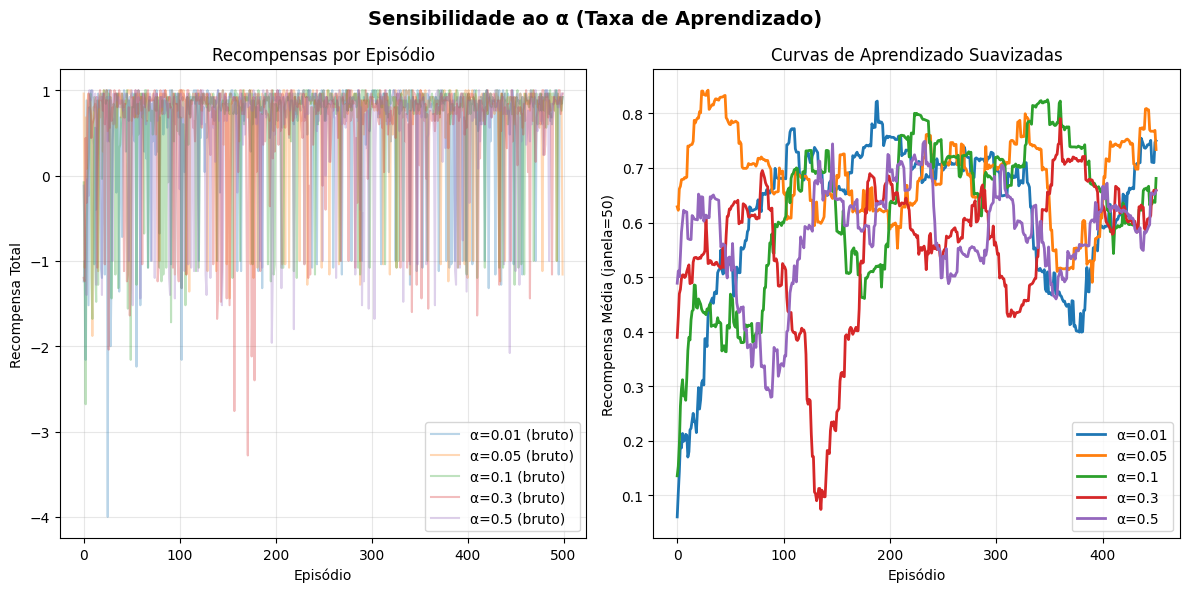


✓ Análise concluída!


In [28]:
# Testar diferentes valores de alpha
alphas = [0.01, 0.05, 0.1, 0.3, 0.5]
results_alpha = {}

print("ANÁLISE DE SENSIBILIDADE - PARÂMETRO ALPHA")
print("="*60)

for alpha in alphas:
    print(f"\n→ Treinando com α = {alpha}...")
    Q, rewards = q_learning(
        gw,
        n_episodes=500,
        alpha=alpha,
        gamma=0.9,
        epsilon=0.1
    )

    results_alpha[f'α={alpha}'] = rewards

    # Calcular valor médio
    values = []
    for state in gw.states:
        if not gw.is_terminal(state) and state not in gw.walls:
            state_idx = state[0] * gw.cols + state[1]
            values.append(np.max(Q[state_idx]))

    avg_value = np.mean(values)
    print(f"   Valor médio final: {avg_value:.4f}")

# Plotar comparação
plot_learning_curves(results_alpha, window=50,
                    title="Sensibilidade ao α (Taxa de Aprendizado)")

print("\n✓ Análise concluída!")

## 🔧 PASSO 8: Análise de Sensibilidade - Epsilon

```python
# Testar diferentes valores de epsilon
epsilons = [0.0, 0.05, 0.1, 0.2, 0.3]
results_epsilon = {}

print("ANÁLISE DE SENSIBILIDADE - PARÂMETRO EPSILON")
print("="*60)

for eps in epsilons:
    print(f"\n→ Treinando com ε = {eps}...")
    Q, rewards = expected_sarsa(
        gw,
        n_episodes=500,
        alpha=0.1,
        gamma=0.9,
        epsilon=eps
    )
    
    results_epsilon[f'ε={eps}'] = rewards
    
    # Calcular recompensa média final
    avg_reward_final = np.mean(rewards[-100:])
    print(f"   Recompensa média (últimos 100): {avg_reward_final:.4f}")

# Plotar comparação
plot_learning_curves(results_epsilon, window=50,
                    title="Sensibilidade ao ε (Exploração)")

print("\n✓ Análise concluída!")
```

ANÁLISE DE SENSIBILIDADE - PARÂMETRO EPSILON

→ Treinando com ε = 0.0...
   Recompensa média (últimos 100): 0.6856

→ Treinando com ε = 0.05...
   Recompensa média (últimos 100): 0.7696

→ Treinando com ε = 0.1...
   Recompensa média (últimos 100): 0.6272

→ Treinando com ε = 0.2...
   Recompensa média (últimos 100): 0.5764

→ Treinando com ε = 0.3...
   Recompensa média (últimos 100): 0.5340


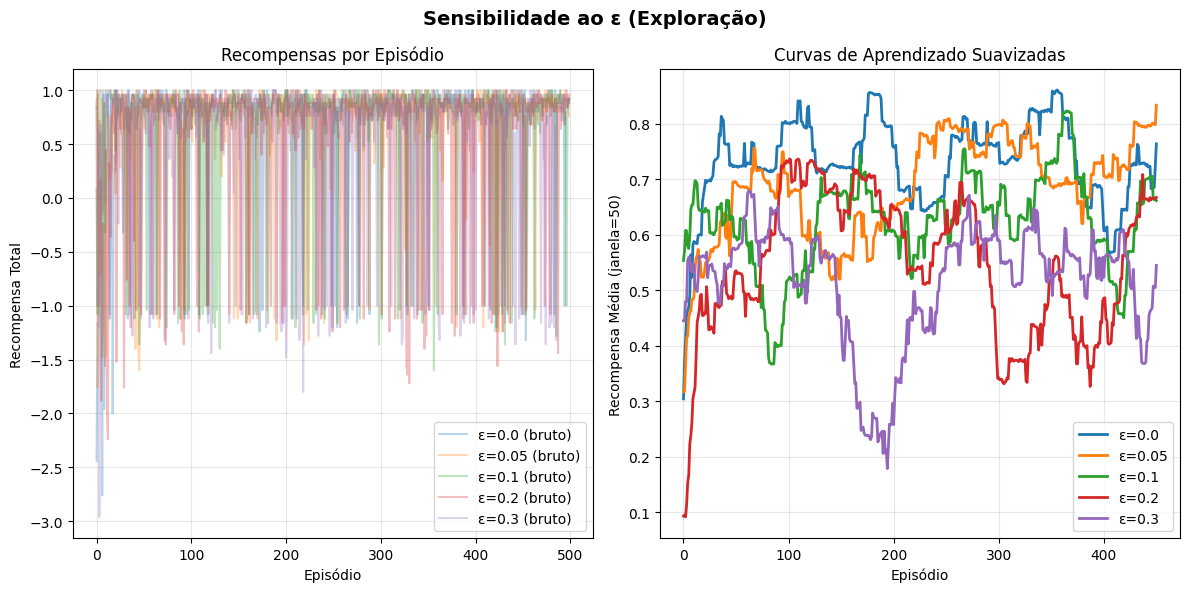


✓ Análise concluída!


In [29]:
# Testar diferentes valores de epsilon
epsilons = [0.0, 0.05, 0.1, 0.2, 0.3]
results_epsilon = {}

print("ANÁLISE DE SENSIBILIDADE - PARÂMETRO EPSILON")
print("="*60)

for eps in epsilons:
    print(f"\n→ Treinando com ε = {eps}...")
    Q, rewards = sarsa(
        gw,
        n_episodes=500,
        alpha=0.1,
        gamma=0.9,
        epsilon=eps
    )

    results_epsilon[f'ε={eps}'] = rewards

    # Calcular recompensa média final
    avg_reward_final = np.mean(rewards[-100:])
    print(f"   Recompensa média (últimos 100): {avg_reward_final:.4f}")

# Plotar comparação
plot_learning_curves(results_epsilon, window=50,
                    title="Sensibilidade ao ε (Exploração)")

print("\n✓ Análise concluída!")

## 🏗️ PASSO 10: Grid Personalizado

```python
# Criar grid personalizado 6x6
gw_custom = create_custom_gridworld(
    rows=6,
    cols=6,
    walls=[(2, 2), (2, 3), (3, 2), (3, 3)],  # Bloco central
    terminals={(0, 5): 10.0, (5, 0): -10.0},  # Dois terminais
    gamma=0.95,
    noise=0.1,
    living_reward=-0.1
)

# Visualizar ambiente
visualize_gridworld(gw_custom, title="Grid Personalizado 6x6")
print_gridworld_info(gw_custom)

# Treinar
print("\n→ Treinando Q-Learning no grid customizado...")
Q_custom, rewards_custom = q_learning(
    gw_custom,
    n_episodes=2000,
    alpha=0.1,
    gamma=0.95,
    epsilon=0.1,
    verbose=True
)

# Visualizar resultados
policy_custom = get_greedy_policy(Q_custom, gw_custom)
visualize_gridworld(gw_custom, policy=policy_custom,
                   title="Grid 6x6 - Política Aprendida")
visualize_q_table_detailed(Q_custom, gw_custom,
                          title="Grid 6x6 - Q-Values Detalhados")

# Curva de aprendizado
plot_learning_curves({'Q-Learning (6x6)': rewards_custom},
                    window=100,
                    title="Aprendizado no Grid 6x6")

print("\n✓ Experimento no grid customizado concluído!")
```

In [30]:
# Criar grid personalizado 6x6
gw_custom = create_custom_gridworld(
    rows=6,
    cols=6,
    walls=[(2, 2), (2, 3), (3, 2), (3, 3)],  # Bloco central
    terminals={(0, 5): 10.0, (5, 0): -10.0},  # Dois terminais
    gamma=0.95,
    noise=0.1,
    living_reward=-0.1
)

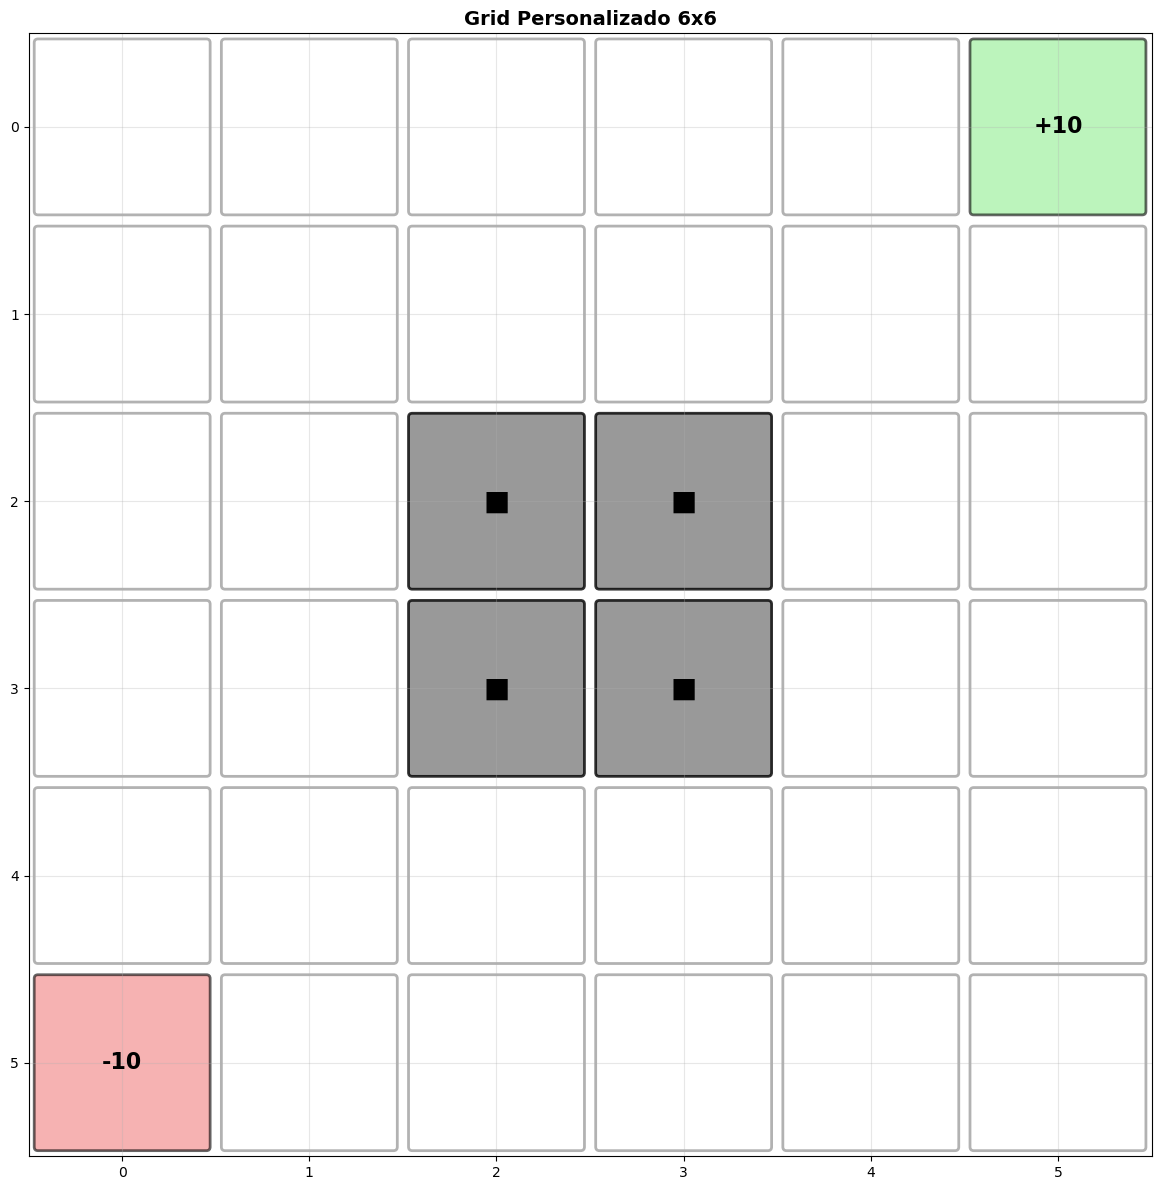

In [ ]:
# Visualizar ambiente
visualize_gridworld(gw_custom, title="Grid Personalizado 6x6")

In [31]:
print_gridworld_info(gw_custom)

INFORMAÇÕES DO GRIDWORLD
Dimensões: 6 linhas x 6 colunas
Total de estados: 32
Paredes: 4
Estados terminais: 2
Fator de desconto (γ): 0.95
Ruído: 0.1
Living reward: -0.1
Ações disponíveis: ['N', 'S', 'L', 'O']

Paredes: [(2, 2), (2, 3), (3, 2), (3, 3)]

Estados terminais:
  (0, 5): reward = 10.0
  (5, 0): reward = -10.0


In [32]:
# Treinar
print("\n→ Treinando Q-Learning no grid customizado...")
Q_custom, rewards_custom = q_learning(
    gw_custom,
    n_episodes=2000,
    alpha=0.1,
    gamma=0.95,
    epsilon=0.1,
    verbose=True
)


→ Treinando Q-Learning no grid customizado...
Episódio 100/2000 - Reward médio: 7.33
Episódio 200/2000 - Reward médio: 9.28
Episódio 300/2000 - Reward médio: 9.40
Episódio 400/2000 - Reward médio: 9.45
Episódio 500/2000 - Reward médio: 9.44
Episódio 600/2000 - Reward médio: 9.47
Episódio 700/2000 - Reward médio: 9.48
Episódio 800/2000 - Reward médio: 9.41
Episódio 900/2000 - Reward médio: 9.42
Episódio 1000/2000 - Reward médio: 9.46
Episódio 1100/2000 - Reward médio: 9.25
Episódio 1200/2000 - Reward médio: 9.51
Episódio 1300/2000 - Reward médio: 9.22
Episódio 1400/2000 - Reward médio: 9.42
Episódio 1500/2000 - Reward médio: 9.41
Episódio 1600/2000 - Reward médio: 9.23
Episódio 1700/2000 - Reward médio: 9.40
Episódio 1800/2000 - Reward médio: 9.30
Episódio 1900/2000 - Reward médio: 9.46
Episódio 2000/2000 - Reward médio: 9.40


In [33]:
# Visualizar resultados
policy_custom = get_greedy_policy(Q_custom, gw_custom)

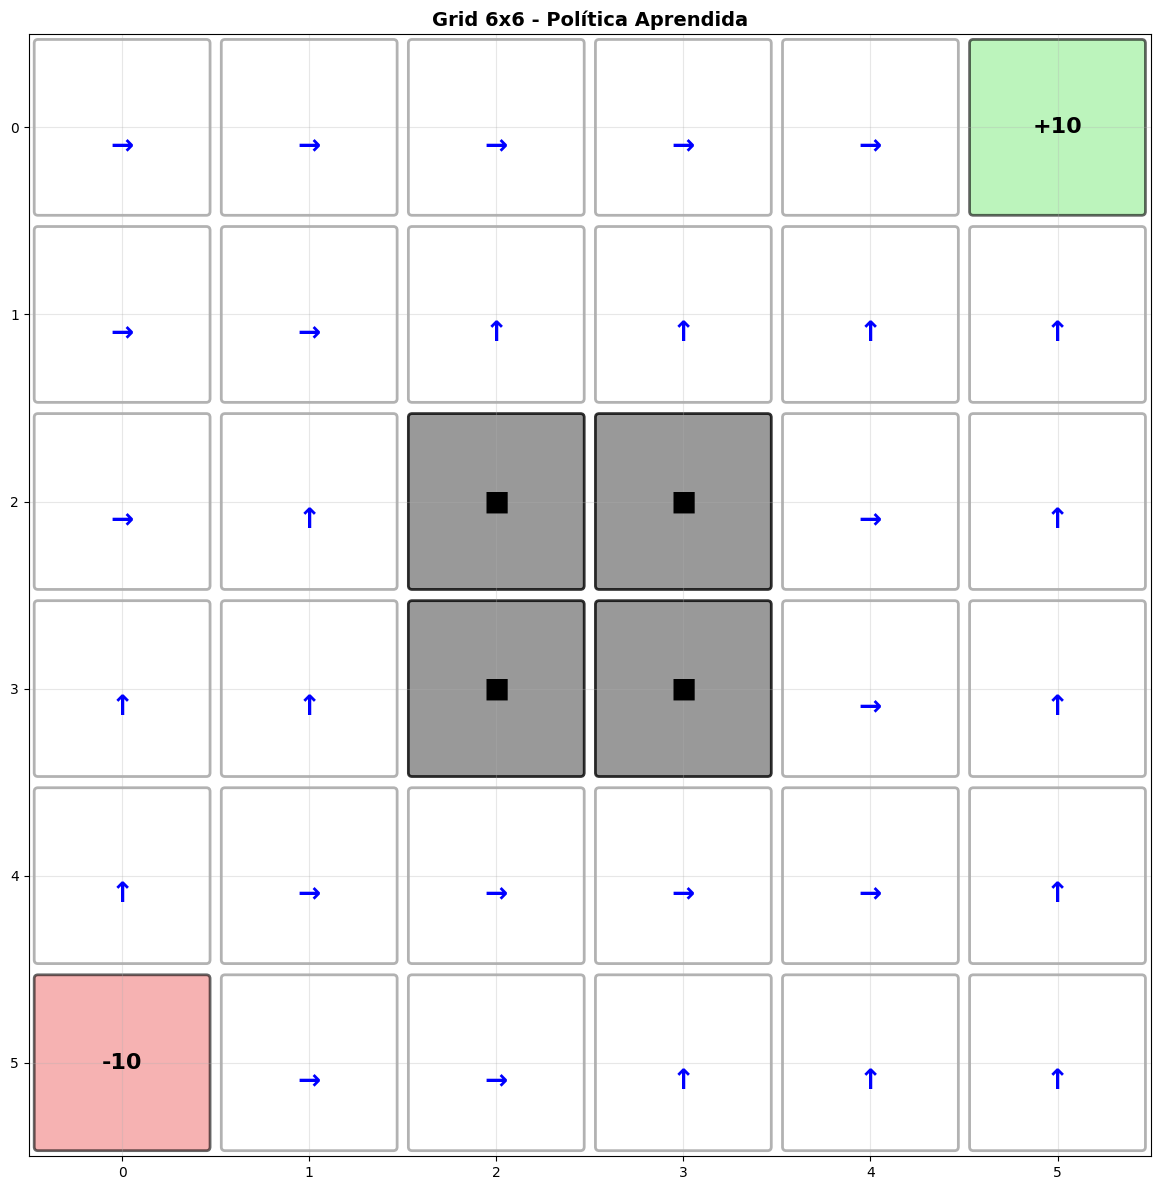

In [34]:
visualize_gridworld(gw_custom, policy=policy_custom,
                   title="Grid 6x6 - Política Aprendida")

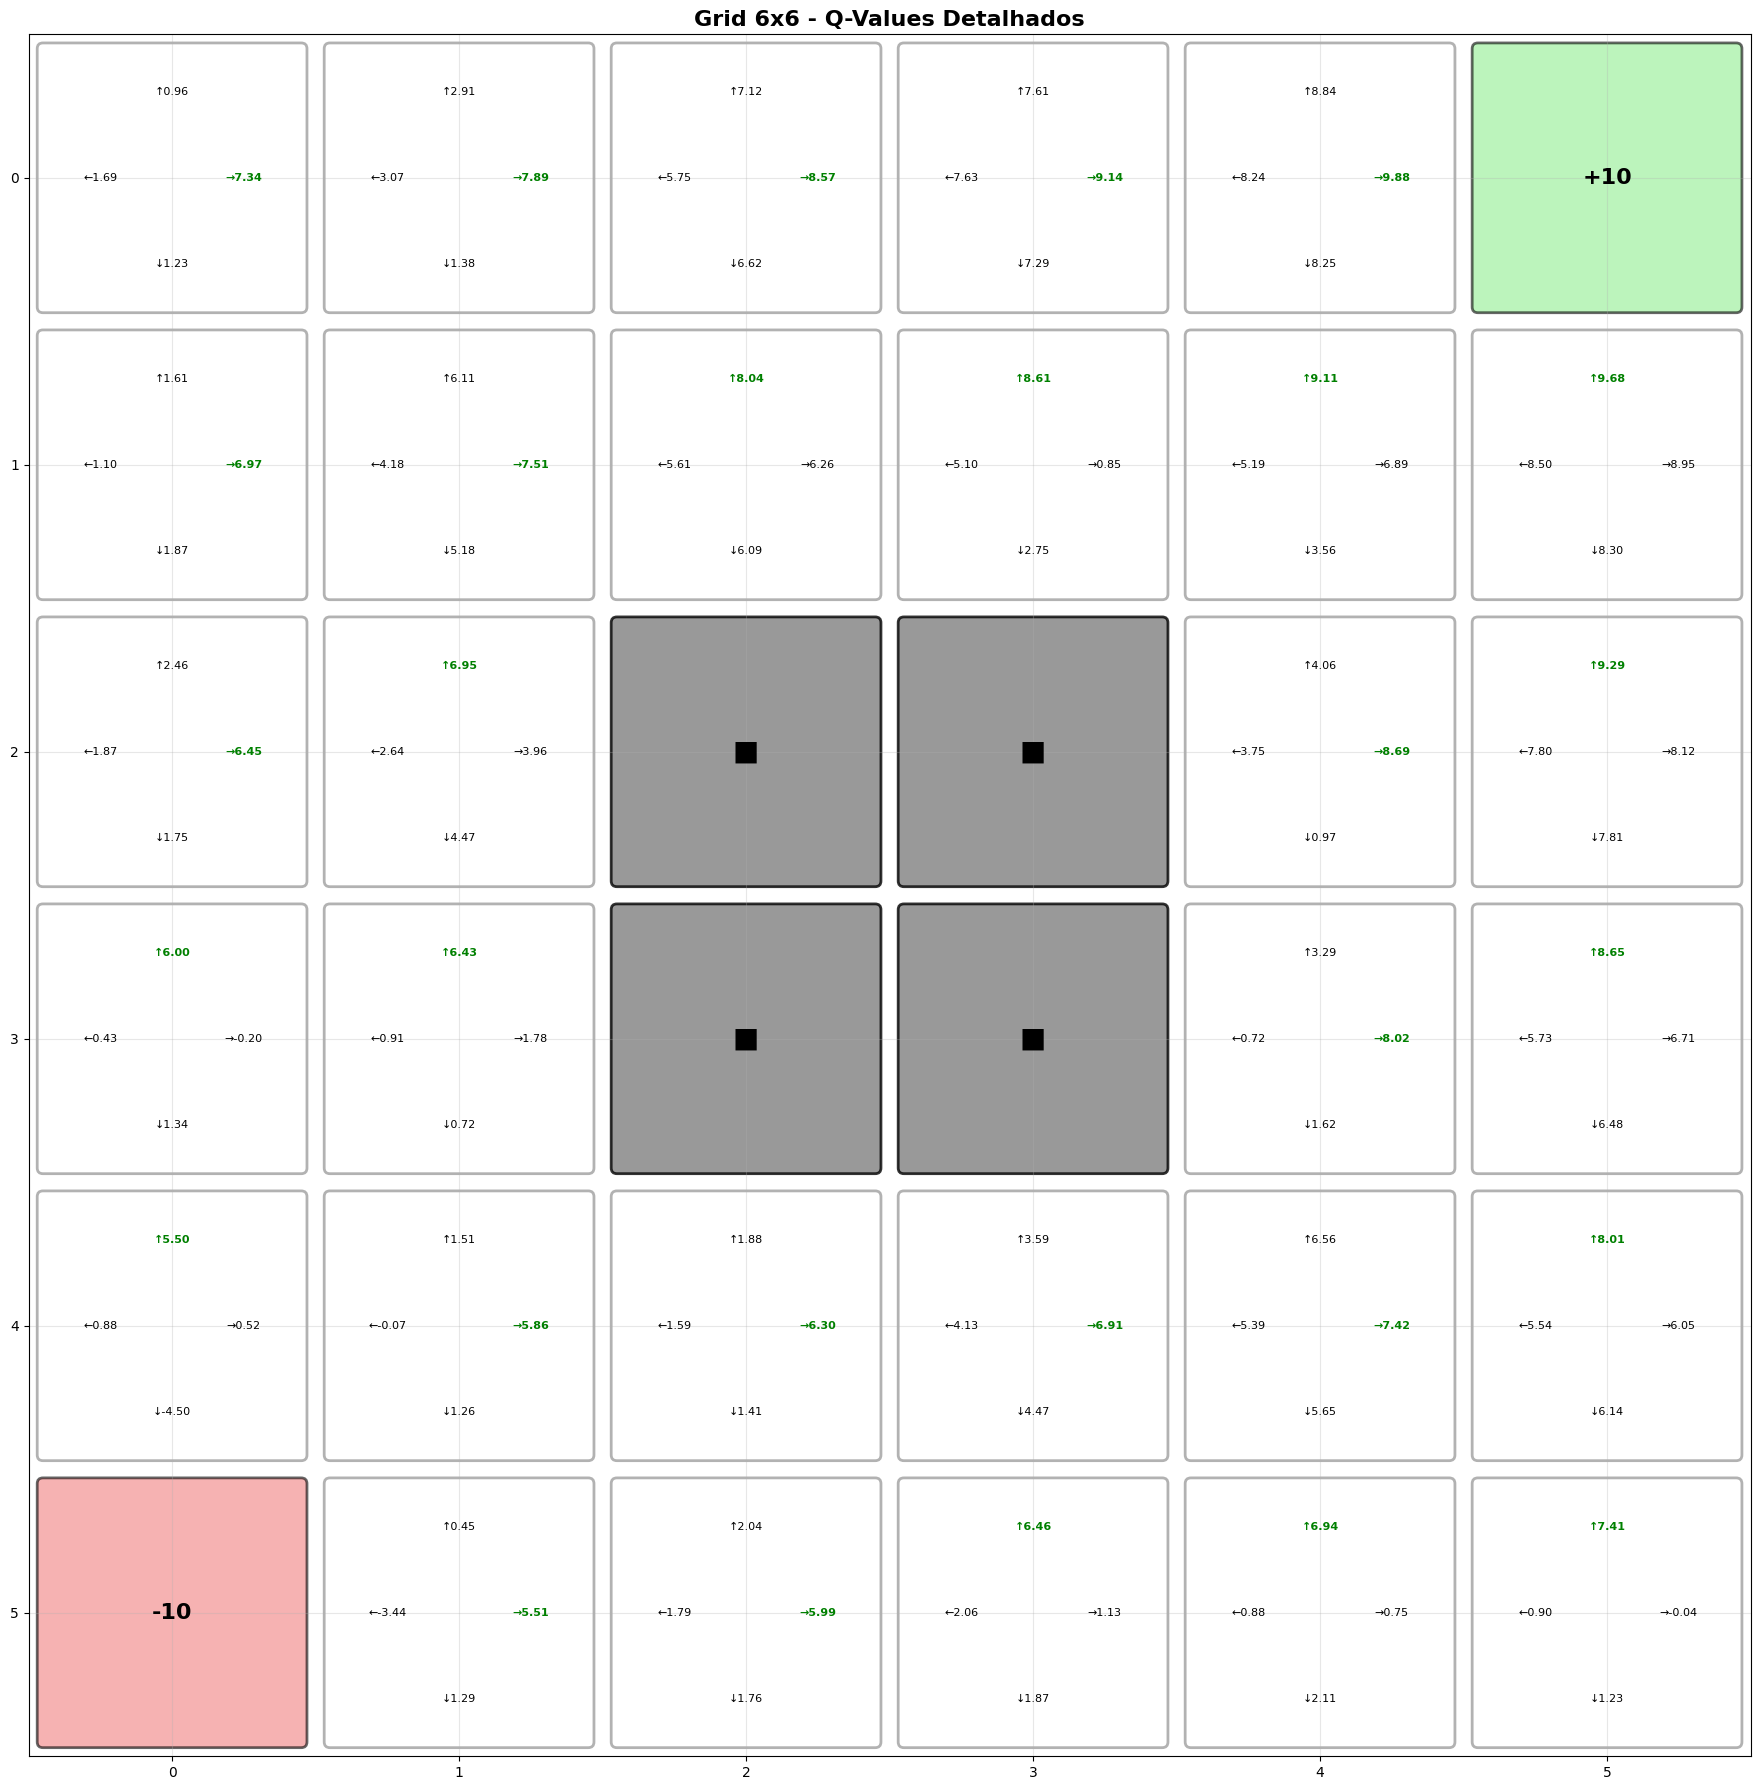

In [35]:
visualize_q_table_detailed(Q_custom, gw_custom,
                          title="Grid 6x6 - Q-Values Detalhados")

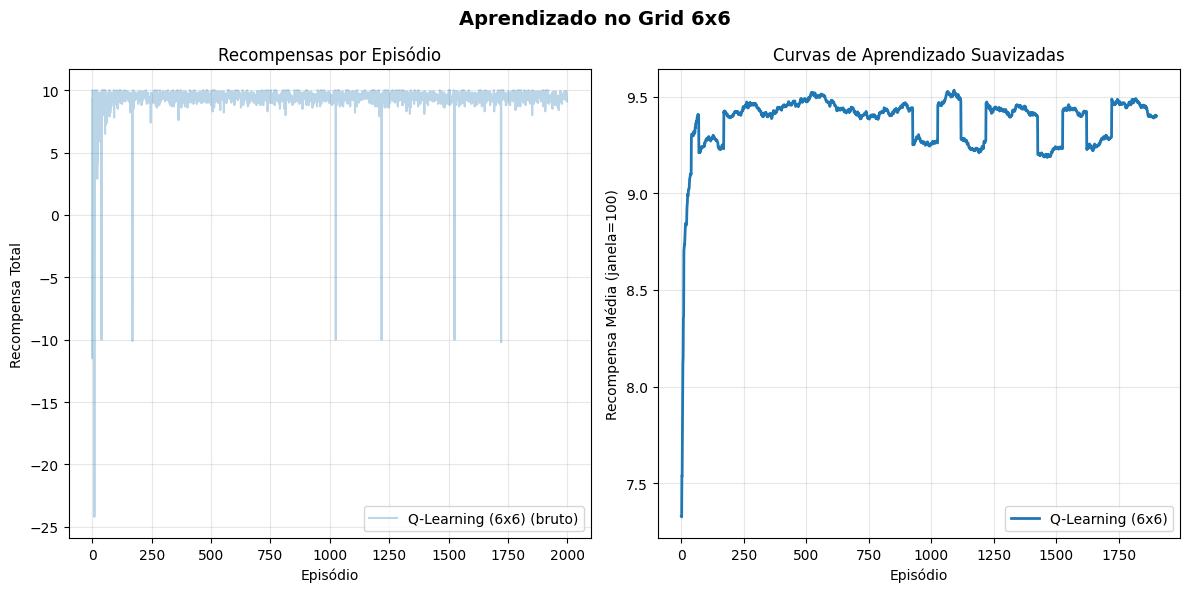


✓ Experimento no grid customizado concluído!


In [36]:
# Curva de aprendizado
plot_learning_curves({'Q-Learning (6x6)': rewards_custom},
                    window=100,
                    title="Aprendizado no Grid 6x6")

print("\n✓ Experimento no grid customizado concluído!")

## 🎓 PASSO 10: Verificar Documentação (help)

```python
# Ver documentação de um algoritmo
print("="*60)
print("DOCUMENTAÇÃO DO SARSA")
print("="*60)
help(sarsa)
```

In [ ]:
# Ver documentação de um algoritmo
print("="*60)
print("DOCUMENTAÇÃO DO SARSA")
print("="*60)
help(sarsa)

DOCUMENTAÇÃO DO SARSA
Help on function sarsa in module algorithms:

sarsa(gridworld: environment.GridWorld, n_episodes: int = 1000, alpha: float = 0.1, gamma: float = 0.9, epsilon: float = 0.1, q_init: float = 0.0, initial_state: Tuple[int, int] = None, verbose: bool = False) -> Tuple[numpy.ndarray, List[float]]
    Algoritmo SARSA para controle on-policy.
    
    Aprende Q*(s,a) seguindo política ε-greedy.
    Atualiza Q usando a ação que será realmente tomada.
    
    Fórmula:
    --------
    Q(St, At) ← Q(St, At) + α[Rt+1 + γQ(St+1, At+1) - Q(St, At)]
    
    Parâmetros:
    -----------
    gridworld : GridWorld
        Ambiente
    n_episodes : int, default=1000
        Número de episódios
    alpha : float, default=0.1
        Taxa de aprendizado
        - Valores típicos: 0.01 a 0.5
    gamma : float, default=0.9
        Fator de desconto
        - Valores típicos: 0.9 a 0.99
    epsilon : float, default=0.1
        Probabilidade de exploração
        - Valores típicos: 0.01 

## 💾 PASSO 11: Salvar e Carregar Resultados

```python
# Salvar resultados
print("→ Salvando resultados...")

np.save('Q_sarsa.npy', Q_sarsa)
np.save('Q_qlearning.npy', Q_qlearning)
np.save('rewards_sarsa.npy', np.array(rewards_sarsa))
np.save('rewards_qlearning.npy', np.array(rewards_qlearning))

print("✓ Resultados salvos!")

# Carregar resultados (em outra sessão)
print("\n→ Carregando resultados...")

Q_sarsa_loaded = np.load('Q_sarsa.npy')
Q_qlearning_loaded = np.load('Q_qlearning.npy')
rewards_sarsa_loaded = np.load('rewards_sarsa.npy')
rewards_qlearning_loaded = np.load('rewards_qlearning.npy')

print("✓ Resultados carregados!")

# Verificar
print(f"\nShape de Q_sarsa: {Q_sarsa_loaded.shape}")
print(f"Número de episódios: {len(rewards_sarsa_loaded)}")
```

In [37]:
# Salvar resultados
print("→ Salvando resultados...")

np.save('Q_sarsa.npy', Q_sarsa)
np.save('Q_qlearning.npy', Q_qlearning)
np.save('rewards_sarsa.npy', np.array(rewards_sarsa))
np.save('rewards_qlearning.npy', np.array(rewards_qlearning))

print("✓ Resultados salvos!")

# Carregar resultados (em outra sessão)
print("\n→ Carregando resultados...")

Q_sarsa_loaded = np.load('Q_sarsa.npy')
Q_qlearning_loaded = np.load('Q_qlearning.npy')
rewards_sarsa_loaded = np.load('rewards_sarsa.npy')
rewards_qlearning_loaded = np.load('rewards_qlearning.npy')

print("✓ Resultados carregados!")

# Verificar
print(f"\nShape de Q_sarsa: {Q_sarsa_loaded.shape}")
print(f"Número de episódios: {len(rewards_sarsa_loaded)}")

→ Salvando resultados...
✓ Resultados salvos!

→ Carregando resultados...
✓ Resultados carregados!

Shape de Q_sarsa: (12, 4)
Número de episódios: 1000


## 📝 PASSO 12: Imprimir Tabela Q Formatada

```python
# Imprimir tabela Q de forma legível
print_q_table(Q_qlearning, gw, title="Q-LEARNING - TABELA Q COMPLETA")
```

In [38]:
# Imprimir tabela Q de forma legível
print_q_table(Q_qlearning, gw, title="Q-LEARNING - TABELA Q COMPLETA")


                         Q-LEARNING - TABELA Q COMPLETA                         

Estado (0, 0):
     N: 0.3053
     S: 0.2704
  → L: 0.6105
     O: 0.2823
  Melhor ação: L

Estado (0, 1):
     N: 0.3295
     S: 0.5319
  → L: 0.7793
     O: 0.3203
  Melhor ação: L

Estado (0, 2):
     N: 0.7874
     S: 0.5151
  → L: 0.9790
     O: 0.5907
  Melhor ação: L

Estado (0, 3): TERMINAL

Estado (1, 0):
  → N: 0.4786
     S: 0.0139
     L: 0.1073
     O: 0.1455
  Melhor ação: N

Estado (1, 2):
  → N: 0.5770
     S: 0.0785
     L: -0.6458
     O: 0.3291
  Melhor ação: N

Estado (1, 3): TERMINAL

Estado (2, 0):
     N: 0.0765
     S: 0.0078
  → L: 0.2367
     O: -0.0149
  Melhor ação: L

Estado (2, 1):
     N: 0.1600
     S: 0.1387
  → L: 0.2968
     O: 0.0189
  Melhor ação: L

Estado (2, 2):
  → N: 0.4250
     S: 0.1930
     L: 0.1171
     O: 0.2204
  Melhor ação: N

Estado (2, 3):
     N: -0.5099
     S: -0.0434
     L: -0.0387
  → O: 0.2637
  Melhor ação: O


## 🎯 PASSO 13: Monte Carlo Exploring Starts

```python
# Treinar MC Exploring Starts
print("→ Treinando MC Exploring Starts...")
Q_es, rewards_es = mc_exploring_starts(
    gridworld=gw,
    n_episodes=1000,
    alpha=0.1,
    max_steps=500,  # Limite para evitar loops infinitos
    verbose=True
)

# Extrair política
policy_es = get_greedy_policy(Q_es, gw)

# Visualizar
visualize_gridworld(gw, policy=policy_es,
                   title="MC Exploring Starts - Política")
visualize_q_values(Q_es, gw,
                  title="MC Exploring Starts - Valores Q")

# Comparar com Q-Learning
plot_learning_curves({
    'MC Exploring Starts': rewards_es,
    'Q-Learning': rewards_qlearning
}, window=100, title="MC Exploring Starts vs Q-Learning")

print("\n✓ Treinamento concluído!")
```

In [39]:
# Treinar MC Exploring Starts
print("→ Treinando MC Exploring Starts...")
Q_es, rewards_es = mc_exploring_starts(
    gridworld=gw,
    n_episodes=1000,
    alpha=0.1,
    max_steps=500,  # Limite para evitar loops infinitos
    verbose=True
)

→ Treinando MC Exploring Starts...
⚠️  Episódio 1: Atingiu max_steps=500
Episódio 100/1000 - Reward médio: -6.19
Episódio 200/1000 - Reward médio: -7.76
Episódio 300/1000 - Reward médio: -5.89
Episódio 400/1000 - Reward médio: -5.48
Episódio 500/1000 - Reward médio: -4.94
Episódio 600/1000 - Reward médio: -5.44
Episódio 700/1000 - Reward médio: -4.99
Episódio 800/1000 - Reward médio: -1.01
Episódio 900/1000 - Reward médio: -5.12
Episódio 1000/1000 - Reward médio: -8.39


In [40]:
# Extrair política
policy_es = get_greedy_policy(Q_es, gw)

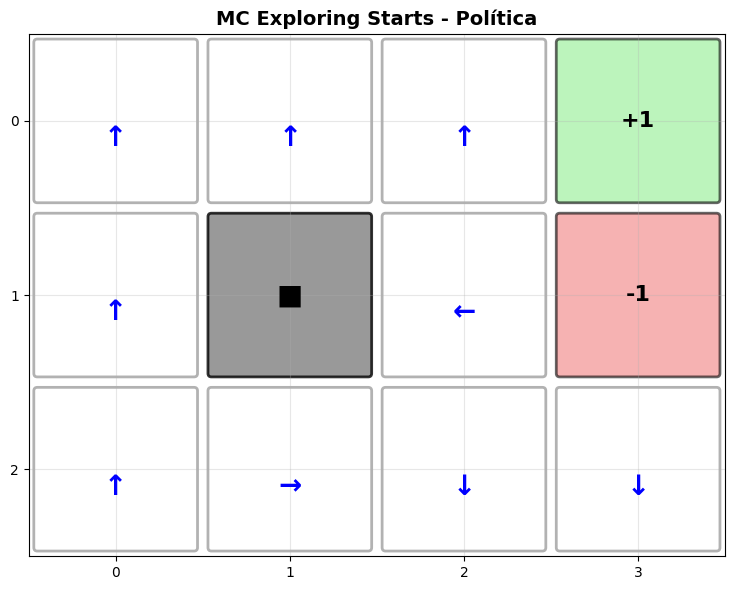

In [41]:
# Visualizar
visualize_gridworld(gw, policy=policy_es,
                   title="MC Exploring Starts - Política")

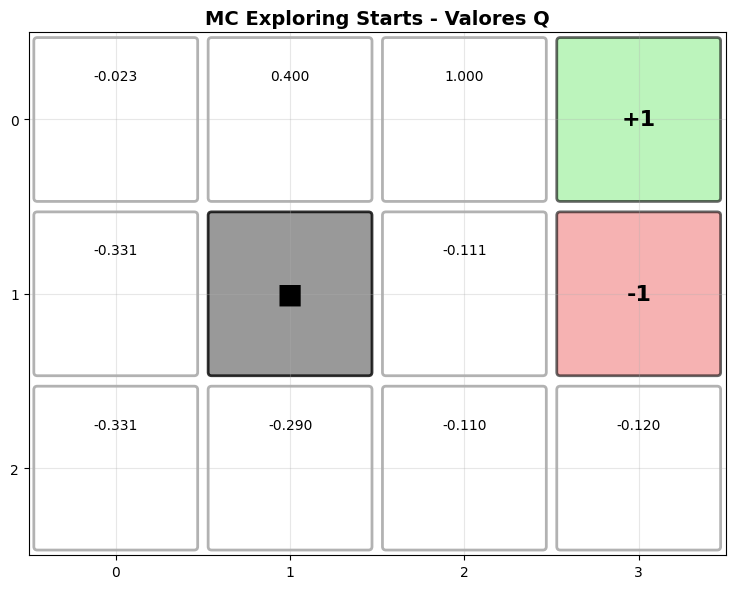

In [42]:
visualize_q_values(Q_es, gw,
                  title="MC Exploring Starts - Valores Q")

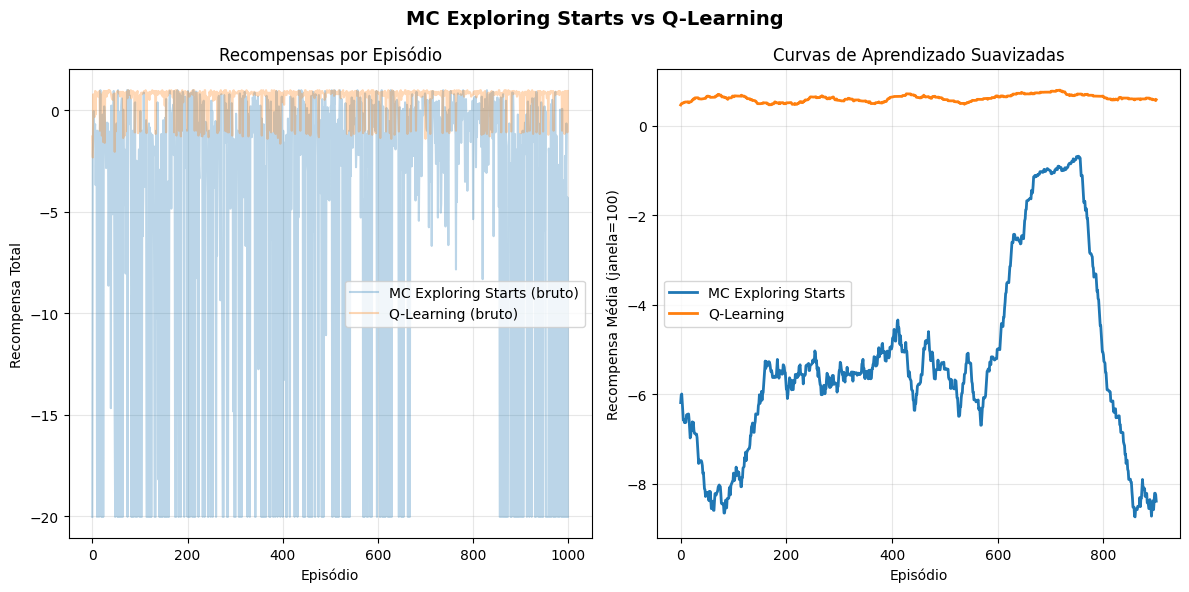


✓ Treinamento concluído!


In [43]:
# Comparar com Q-Learning
plot_learning_curves({
    'MC Exploring Starts': rewards_es,
    'Q-Learning': rewards_qlearning
}, window=100, title="MC Exploring Starts vs Q-Learning")

print("\n✓ Treinamento concluído!")

## 🔬 PASSO 14: Experimento Completo - Múltiplas Runs

```python
# Executar Q-Learning múltiplas vezes para reduzir variância
print("EXPERIMENTO: MÚLTIPLAS RUNS (10x)")
print("="*60)

n_runs = 10
all_rewards = []

for run in range(n_runs):
    print(f"\n→ Run {run+1}/{n_runs}...")
    Q, rewards = q_learning(
        gw,
        n_episodes=500,
        alpha=0.1,
        gamma=0.9,
        epsilon=0.1
    )
    all_rewards.append(rewards)
    print(f"   Recompensa média final: {np.mean(rewards[-50:]):.2f}")

# Calcular média e desvio padrão
all_rewards = np.array(all_rewards)
mean_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)

# Plotar com intervalo de confiança
plt.figure(figsize=(12, 6))
plt.plot(mean_rewards, label='Média', linewidth=2)
plt.fill_between(range(len(mean_rewards)),
                 mean_rewards - std_rewards,
                 mean_rewards + std_rewards,
                 alpha=0.3, label='±1 Desvio Padrão')
plt.xlabel('Episódio')
plt.ylabel('Recompensa')
plt.title('Q-Learning - 10 Runs com Intervalo de Confiança')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Experimento de múltiplas runs concluído!")
```

In [44]:
# Executar Q-Learning múltiplas vezes para reduzir variância
print("EXPERIMENTO: MÚLTIPLAS RUNS (10x)")
print("="*60)

n_runs = 10
all_rewards = []

for run in range(n_runs):
    print(f"\n→ Run {run+1}/{n_runs}...")
    Q, rewards = q_learning(
        gw,
        n_episodes=500,
        alpha=0.1,
        gamma=0.9,
        epsilon=0.1
    )
    all_rewards.append(rewards)
    print(f"   Recompensa média final: {np.mean(rewards[-50:]):.2f}")

EXPERIMENTO: MÚLTIPLAS RUNS (10x)

→ Run 1/10...
   Recompensa média final: 0.57

→ Run 2/10...
   Recompensa média final: 0.63

→ Run 3/10...
   Recompensa média final: 0.82

→ Run 4/10...
   Recompensa média final: 0.60

→ Run 5/10...
   Recompensa média final: 0.56

→ Run 6/10...
   Recompensa média final: 0.66

→ Run 7/10...
   Recompensa média final: 0.74

→ Run 8/10...
   Recompensa média final: 0.60

→ Run 9/10...
   Recompensa média final: 0.69

→ Run 10/10...
   Recompensa média final: 0.67


In [45]:
# Calcular média e desvio padrão
all_rewards = np.array(all_rewards)
mean_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)

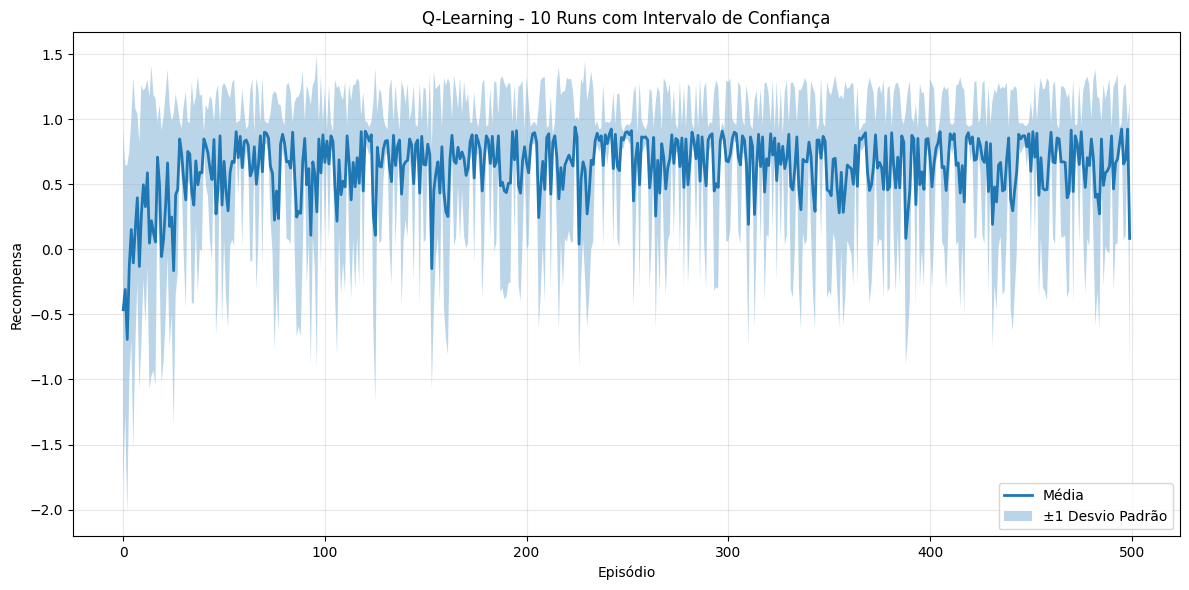


✓ Experimento de múltiplas runs concluído!


In [46]:
# Plotar com intervalo de confiança
plt.figure(figsize=(12, 6))
plt.plot(mean_rewards, label='Média', linewidth=2)
plt.fill_between(range(len(mean_rewards)),
                 mean_rewards - std_rewards,
                 mean_rewards + std_rewards,
                 alpha=0.3, label='±1 Desvio Padrão')
plt.xlabel('Episódio')
plt.ylabel('Recompensa')
plt.title('Q-Learning - 10 Runs com Intervalo de Confiança')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Experimento de múltiplas runs concluído!")

## 🌊 CÉLULA 16: Cliff World

```python
# Criar Cliff World
gw_cliff = create_cliff_world()

# Visualizar ambiente
visualize_gridworld(gw_cliff, title="Cliff World")
print_gridworld_info(gw_cliff)

# Treinar SARSA (conservador)
print("\n→ Treinando SARSA (on-policy, conservador)...")
Q_sarsa_cliff, rewards_sarsa_cliff = sarsa(
    gw_cliff,
    n_episodes=500,
    alpha=0.1,
    gamma=0.9,
    epsilon=0.1
)

# Treinar Q-Learning (agressivo)
print("\n→ Treinando Q-Learning (off-policy, agressivo)...")
Q_qlearn_cliff, rewards_qlearn_cliff = q_learning(
    gw_cliff,
    n_episodes=500,
    alpha=0.1,
    gamma=0.9,
    epsilon=0.1
)

# Comparar políticas
policy_sarsa_cliff = get_greedy_policy(Q_sarsa_cliff, gw_cliff)
policy_qlearn_cliff = get_greedy_policy(Q_qlearn_cliff, gw_cliff)

visualize_gridworld(gw_cliff, policy=policy_sarsa_cliff,
                   title="Cliff World - SARSA (Conservador)")
visualize_gridworld(gw_cliff, policy=policy_qlearn_cliff,
                   title="Cliff World - Q-Learning (Agressivo)")

# Comparar curvas
plot_learning_curves({
    'SARSA (Conservador)': rewards_sarsa_cliff,
    'Q-Learning (Agressivo)': rewards_qlearn_cliff
}, window=50, title="Cliff World: SARSA vs Q-Learning")

print("\n✓ Experimento Cliff World concluído!")
print("\nObservação: SARSA tende a ser mais conservador (evita o cliff)")
print("Q-Learning tende a ser mais agressivo (aprende caminho ótimo mas arriscado)")
```

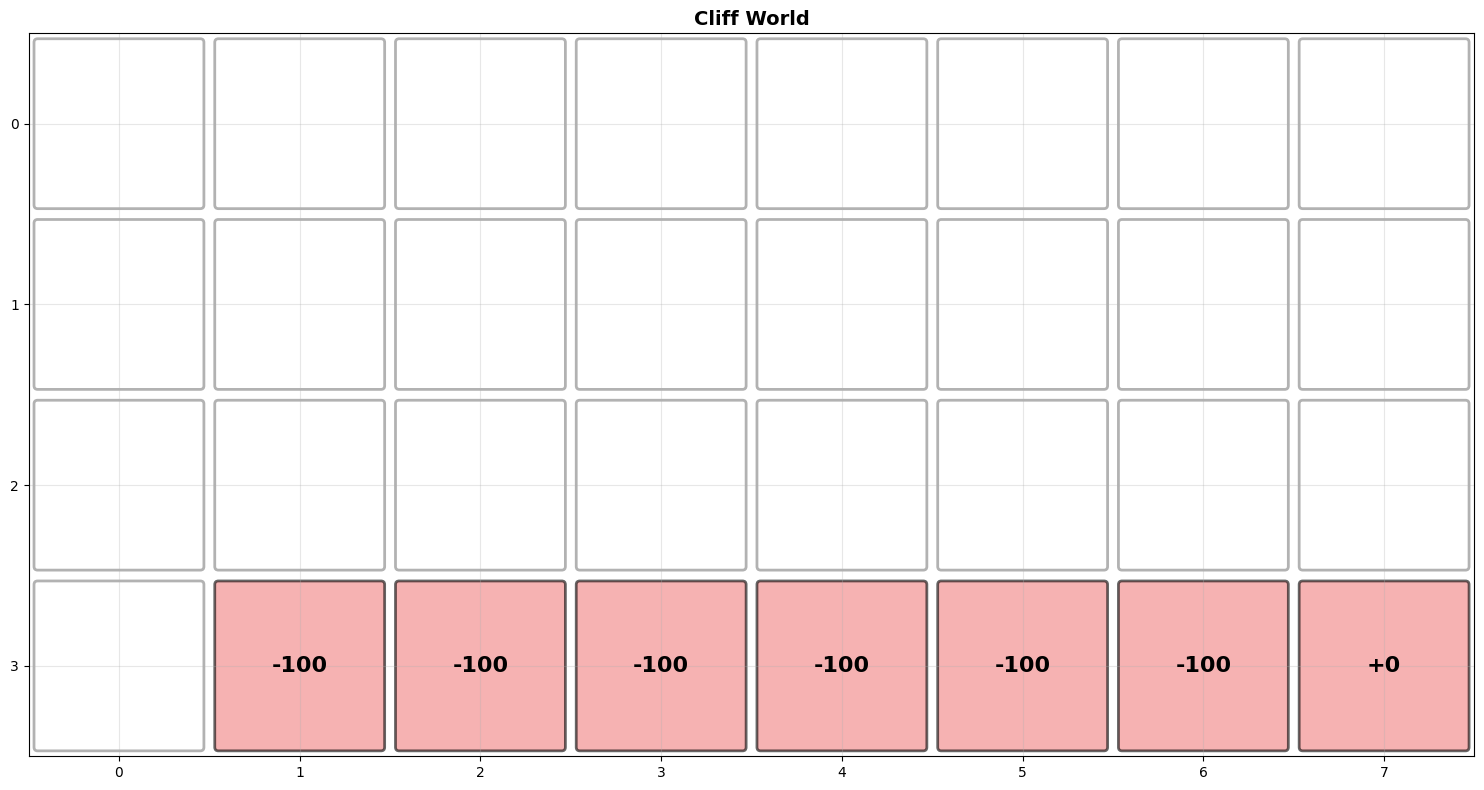

INFORMAÇÕES DO GRIDWORLD
Dimensões: 4 linhas x 8 colunas
Total de estados: 32
Paredes: 0
Estados terminais: 7
Fator de desconto (γ): 0.9
Ruído: 0.0
Living reward: -1.0
Ações disponíveis: ['N', 'S', 'L', 'O']

Estados terminais:
  (3, 1): reward = -100.0
  (3, 2): reward = -100.0
  (3, 3): reward = -100.0
  (3, 4): reward = -100.0
  (3, 5): reward = -100.0
  (3, 6): reward = -100.0
  (3, 7): reward = 0.0


In [47]:
# Criar Cliff World
gw_cliff = create_cliff_world_2()

# Visualizar ambiente
visualize_gridworld(gw_cliff, title="Cliff World")
print_gridworld_info(gw_cliff)

In [48]:
# Treinar SARSA (conservador)
print("\n→ Treinando SARSA (on-policy, conservador)...")
Q_sarsa_cliff, rewards_sarsa_cliff = sarsa(
    gw_cliff,
    n_episodes=500,
    alpha=0.1,
    gamma=0.9,
    epsilon=0.1
)


→ Treinando SARSA (on-policy, conservador)...


In [49]:
# Treinar Q-Learning (agressivo)
print("\n→ Treinando Q-Learning (off-policy, agressivo)...")
Q_qlearn_cliff, rewards_qlearn_cliff = q_learning(
    gw_cliff,
    n_episodes=500,
    alpha=0.1,
    gamma=0.9,
    epsilon=0.1
)


→ Treinando Q-Learning (off-policy, agressivo)...


In [50]:
# Comparar políticas
policy_sarsa_cliff = get_greedy_policy(Q_sarsa_cliff, gw_cliff)
policy_qlearn_cliff = get_greedy_policy(Q_qlearn_cliff, gw_cliff)

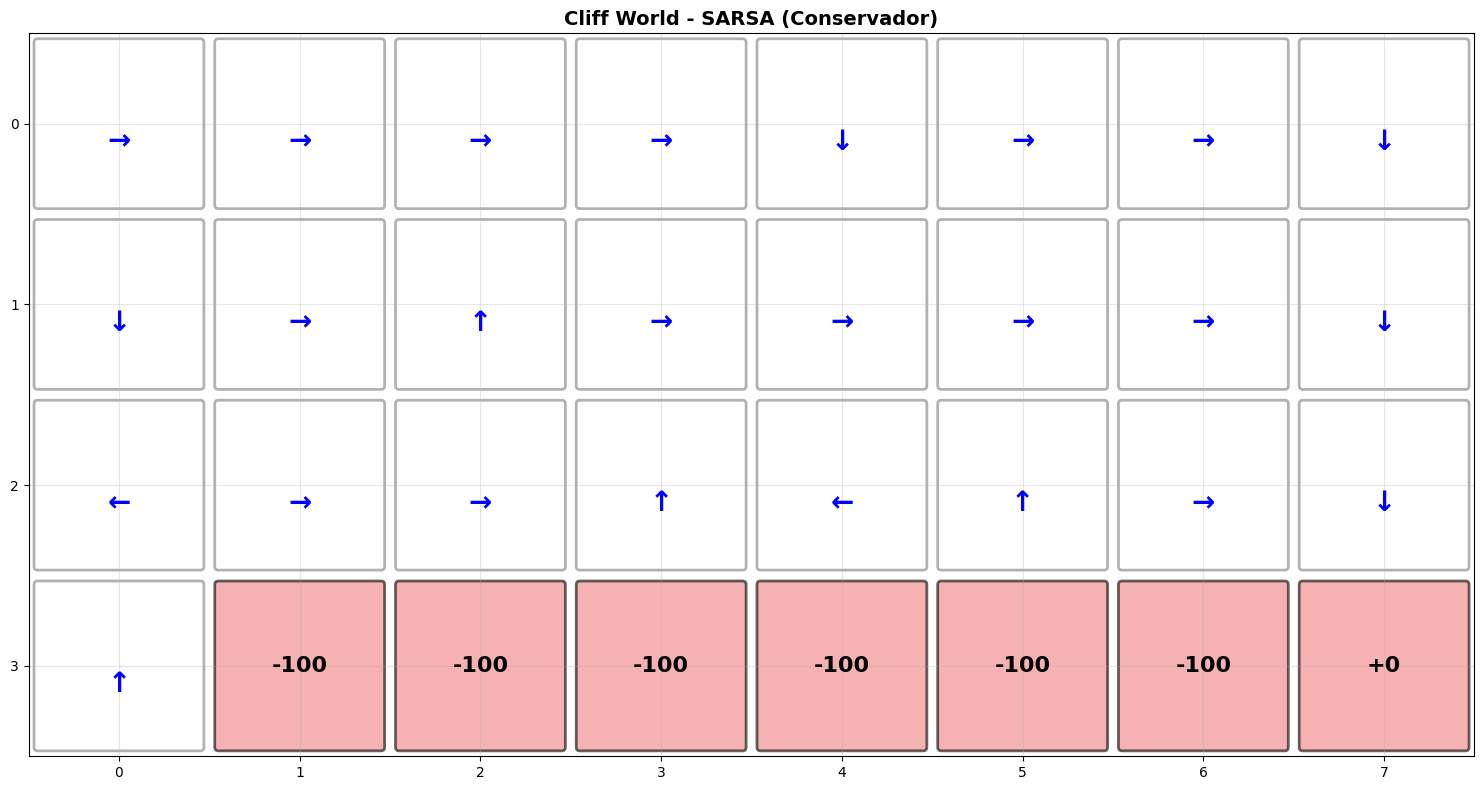

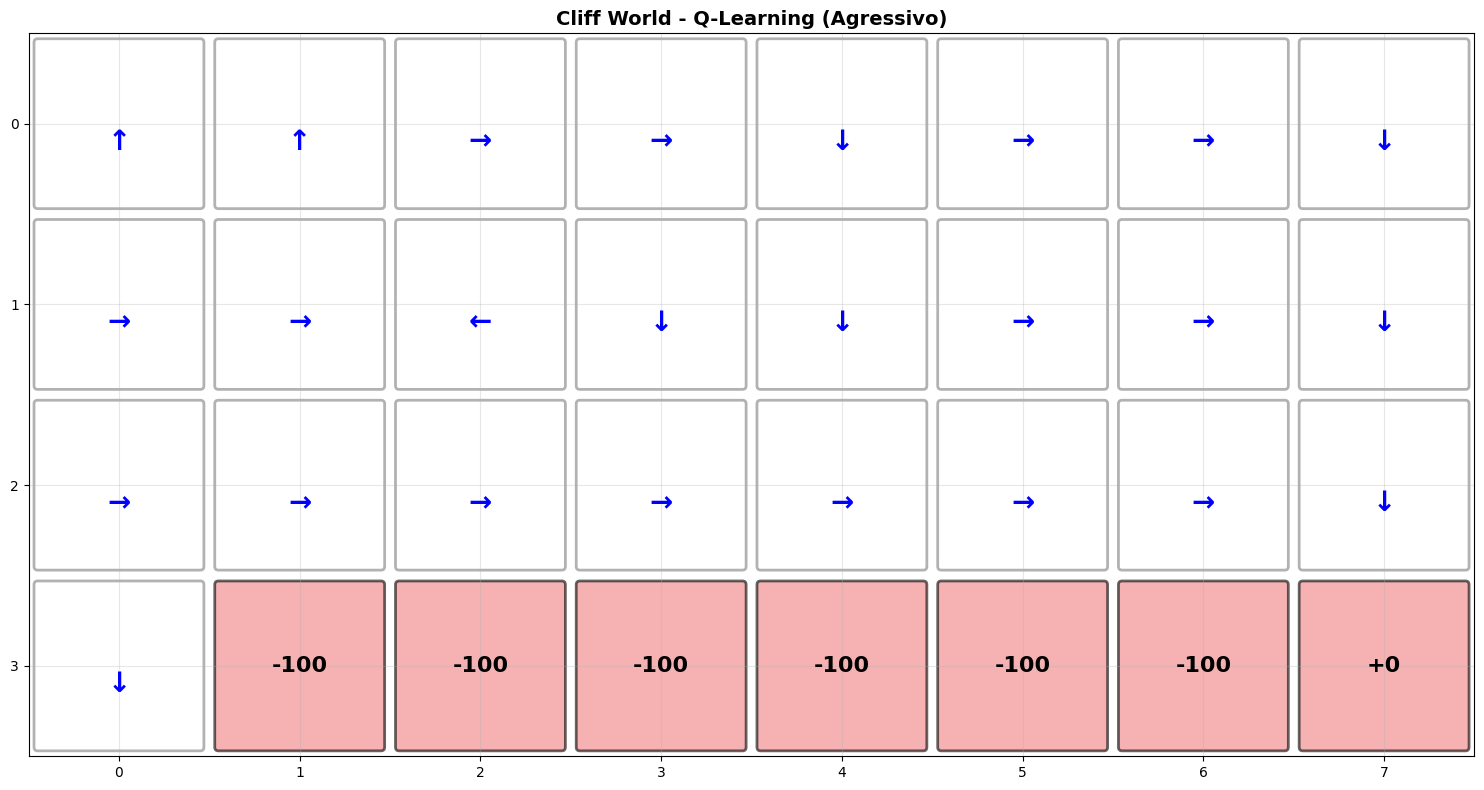

In [51]:
visualize_gridworld(gw_cliff, policy=policy_sarsa_cliff,
                   title="Cliff World - SARSA (Conservador)")
visualize_gridworld(gw_cliff, policy=policy_qlearn_cliff,
                   title="Cliff World - Q-Learning (Agressivo)")

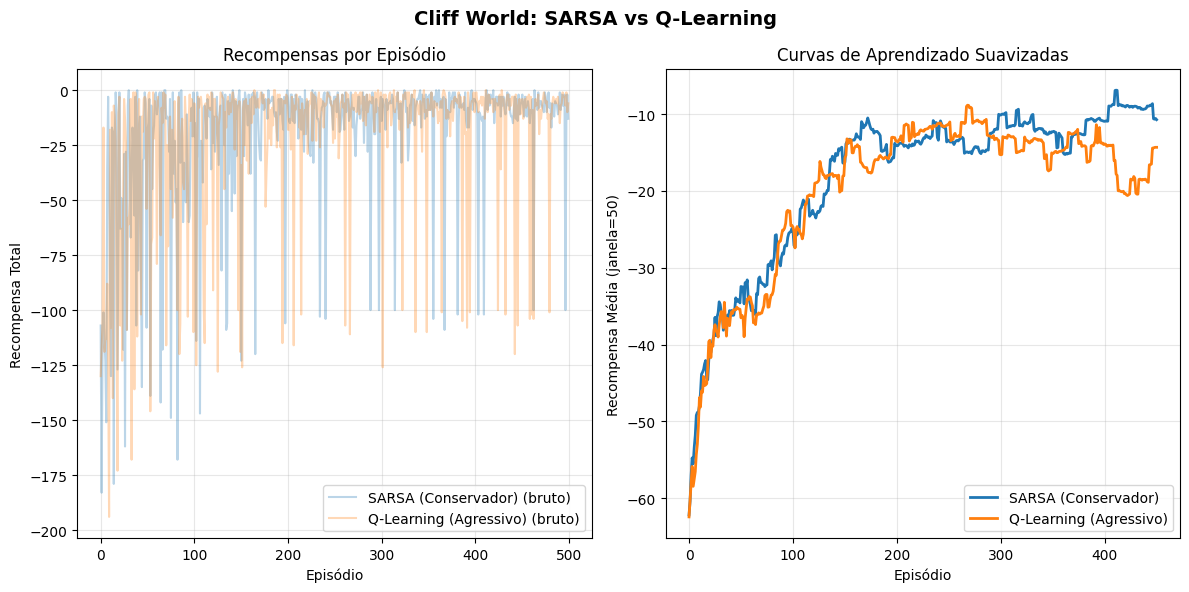


✓ Experimento Cliff World concluído!

Observação: SARSA tende a ser mais conservador (evita o cliff)
Q-Learning tende a ser mais agressivo (aprende caminho ótimo mas arriscado)


In [52]:
# Comparar curvas
plot_learning_curves({
    'SARSA (Conservador)': rewards_sarsa_cliff,
    'Q-Learning (Agressivo)': rewards_qlearn_cliff
}, window=50, title="Cliff World: SARSA vs Q-Learning")

print("\n✓ Experimento Cliff World concluído!")
print("\nObservação: SARSA tende a ser mais conservador (evita o cliff)")
print("Q-Learning tende a ser mais agressivo (aprende caminho ótimo mas arriscado)")

## 🎨 PASSO 16: Heatmaps de Q-Values por Ação

```python
# Criar heatmaps para cada ação
acoes = ['N', 'S', 'L', 'O']
nomes = ['Norte', 'Sul', 'Leste', 'Oeste']

print("HEATMAPS DE Q-VALUES POR AÇÃO")
print("="*60)

for acao, nome in zip(acoes, nomes):
    plot_q_value_heatmap(Q_qlearning, gw, action=acao,
                        title=f"Q(s, {nome})")
```

HEATMAPS DE Q-VALUES POR AÇÃO


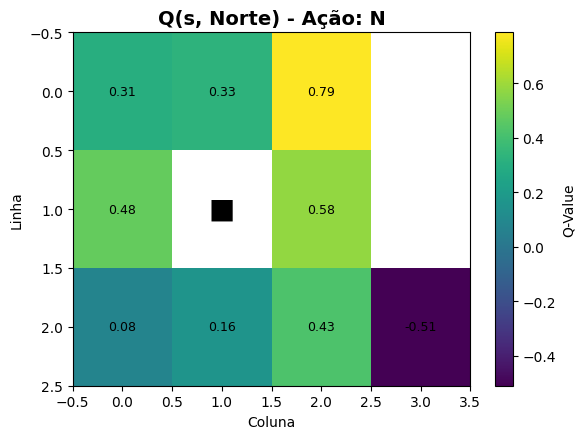

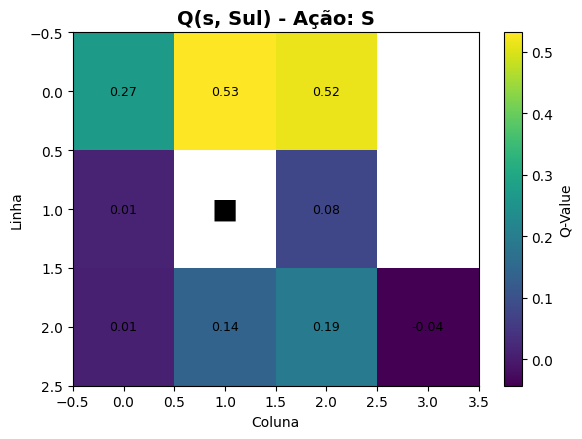

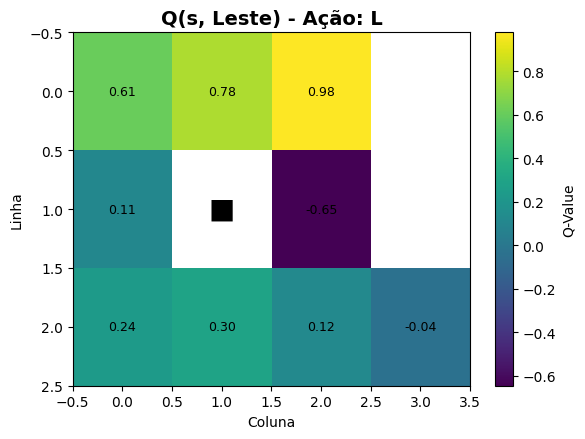

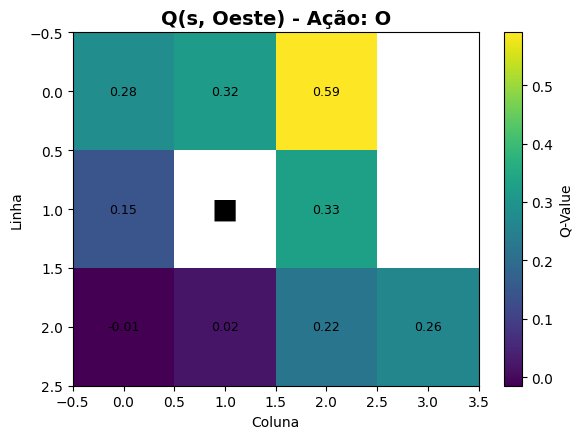

In [53]:
# Criar heatmaps para cada ação
acoes = ['N', 'S', 'L', 'O']
nomes = ['Norte', 'Sul', 'Leste', 'Oeste']

print("HEATMAPS DE Q-VALUES POR AÇÃO")
print("="*60)

for acao, nome in zip(acoes, nomes):
    plot_q_value_heatmap(Q_qlearning, gw, action=acao,
                        title=f"Q(s, {nome})")

## 📊 PASSO 17: Análise Final Detalhada

```python
# Análise completa dos resultados
print("\n" + "="*70)
print("ANÁLISE FINAL - Q-LEARNING")
print("="*70)

# Estatísticas da tabela Q
print("\n1. ESTATÍSTICAS DA TABELA Q:")
print("-"*70)
print(f"   Valor máximo:  {np.max(Q_qlearning):.4f}")
print(f"   Valor mínimo:  {np.min(Q_qlearning):.4f}")
print(f"   Valor médio:   {np.mean(Q_qlearning):.4f}")
print(f"   Desvio padrão: {np.std(Q_qlearning):.4f}")

# Análise da política
print("\n2. ANÁLISE DA POLÍTICA:")
print("-"*70)

policy_final = get_greedy_policy(Q_qlearning, gw)

action_counts = {'N': 0, 'S': 0, 'L': 0, 'O': 0}
for action in policy_final.values():
    action_counts[action] += 1

print("   Distribuição de ações:")
for action, count in action_counts.items():
    percentage = (count / len(policy_final)) * 100
    print(f"     {action}: {count} estados ({percentage:.1f}%)")

# Análise de convergência
print("\n3. ANÁLISE DE CONVERGÊNCIA:")
print("-"*70)
print(f"   Recompensa inicial (média primeiros 50): {np.mean(rewards_qlearning[:50]):.2f}")
print(f"   Recompensa final (média últimos 50):     {np.mean(rewards_qlearning[-50:]):.2f}")
print(f"   Melhoria:                                {np.mean(rewards_qlearning[-50:]) - np.mean(rewards_qlearning[:50]):.2f}")

# Visualizar política final
print("\n4. POLÍTICA FINAL:")
print("-"*70)
visualize_gridworld(gw, policy=policy_final,
                   title="Q-Learning - Política Final")

print("\n✓ Análise completa!")
```

In [54]:
# Análise completa dos resultados
print("\n" + "="*70)
print("ANÁLISE FINAL - Q-LEARNING")
print("="*70)

# Estatísticas da tabela Q
print("\n1. ESTATÍSTICAS DA TABELA Q:")
print("-"*70)
print(f"   Valor máximo:  {np.max(Q_qlearning):.4f}")
print(f"   Valor mínimo:  {np.min(Q_qlearning):.4f}")
print(f"   Valor médio:   {np.mean(Q_qlearning):.4f}")
print(f"   Desvio padrão: {np.std(Q_qlearning):.4f}")


ANÁLISE FINAL - Q-LEARNING

1. ESTATÍSTICAS DA TABELA Q:
----------------------------------------------------------------------
   Valor máximo:  0.9790
   Valor mínimo:  -0.6458
   Valor médio:   0.1861
   Desvio padrão: 0.2953


In [55]:
# Análise da política
print("\n2. ANÁLISE DA POLÍTICA:")
print("-"*70)

policy_final = get_greedy_policy(Q_qlearning, gw)

action_counts = {'N': 0, 'S': 0, 'L': 0, 'O': 0}
for action in policy_final.values():
    action_counts[action] += 1

print("   Distribuição de ações:")
for action, count in action_counts.items():
    percentage = (count / len(policy_final)) * 100
    print(f"     {action}: {count} estados ({percentage:.1f}%)")


2. ANÁLISE DA POLÍTICA:
----------------------------------------------------------------------
   Distribuição de ações:
     N: 3 estados (33.3%)
     S: 0 estados (0.0%)
     L: 5 estados (55.6%)
     O: 1 estados (11.1%)


In [56]:
# Análise de convergência
print("\n3. ANÁLISE DE CONVERGÊNCIA:")
print("-"*70)
print(f"   Recompensa inicial (média primeiros 50): {np.mean(rewards_qlearning[:50]):.2f}")
print(f"   Recompensa final (média últimos 50):     {np.mean(rewards_qlearning[-50:]):.2f}")
print(f"   Melhoria:                                {np.mean(rewards_qlearning[-50:]) - np.mean(rewards_qlearning[:50]):.2f}")


3. ANÁLISE DE CONVERGÊNCIA:
----------------------------------------------------------------------
   Recompensa inicial (média primeiros 50): 0.36
   Recompensa final (média últimos 50):     0.67
   Melhoria:                                0.31



4. POLÍTICA FINAL:
----------------------------------------------------------------------


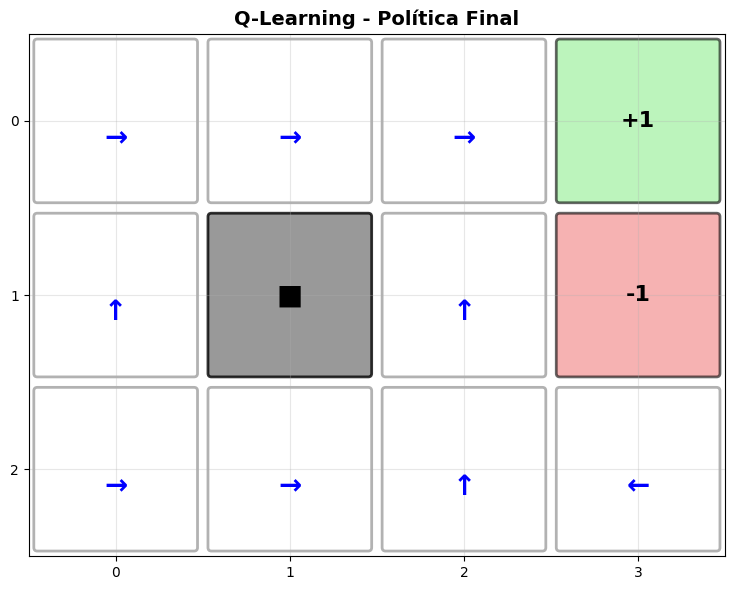


✓ Análise completa!


In [57]:
# Visualizar política final
print("\n4. POLÍTICA FINAL:")
print("-"*70)
visualize_gridworld(gw, policy=policy_final,
                   title="Q-Learning - Política Final")

print("\n✓ Análise completa!")

## 🔄 CÉLULA 19: Template para Seu Próprio Experimento

```python
# ============================================
# SEU EXPERIMENTO PERSONALIZADO
# ============================================

# 1. CONFIGURAÇÃO
print("="*60)
print("MEU EXPERIMENTO CUSTOMIZADO")
print("="*60)

# Criar ambiente (escolha um)
# gw = create_classic_gridworld()
# gw = create_custom_gridworld(rows=5, cols=5, ...)
# gw = create_cliff_world()

# 2. VISUALIZAR AMBIENTE
# visualize_gridworld(gw, title="Meu Ambiente")
# print_gridworld_info(gw)

# 3. DEFINIR PARÂMETROS
params = {
    'n_episodes': 1000,
    'alpha': 0.1,
    'gamma': 0.9,
    'epsilon': 0.1
}

# 4. TREINAR ALGORITMO (escolha um)
# Q, rewards = sarsa(gw, **params, verbose=True)
# Q, rewards = q_learning(gw, **params, verbose=True)
# Q, rewards = expected_sarsa(gw, **params, verbose=True)

# 5. EXTRAIR POLÍTICA
# policy = get_greedy_policy(Q, gw)

# 6. VISUALIZAR RESULTADOS
# visualize_gridworld(gw, policy=policy, title="Política Aprendida")
# visualize_q_values(Q, gw, title="Valores Q")
# plot_learning_curves({'Meu Algoritmo': rewards})

# 7. ANÁLISE
# print_q_table(Q, gw, title="Tabela Q Final")

print("\n✓ Complete as seções acima para seu experimento!")
```